# Running Calculations on GPU

## Check if we can access the GPU

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6367383122380624580
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2150432768
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13623879766666581860
physical_device_desc: "device: 0, name: Quadro P1000, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

# Baby Steps for ML/DL

## Training a Simple Numpy data 

In [2]:
import numpy as np
import tensorflow as tf
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.backend.tensorflow_backend import set_session
import matplotlib.pyplot as plt
%matplotlib inline

import graphviz


Using TensorFlow backend.


In [4]:
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Dense(64, activation='relu'))
# Add another:
model.add(Dense(64, activation='relu'))
# Add another:
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(5, activation='softmax'))

model.compile(optimizer=Adam(0.001),
              loss='mse',
              metrics=['accuracy'])

In [5]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 1
#session = tf.Session(config=config)
set_session(tf.Session(config=config))

In [6]:
data = np.random.random((10000,5))
valdata = np.random.random((10000,5))
#labels = np.random.random((10000,1))
label= data**4
vallabel = valdata**4

In [7]:
data.shape

(10000, 5)

In [8]:
history = model.fit(data,label,validation_data = (valdata,vallabel),epochs=50,batch_size=4096)

Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 0s 38us/step - loss: 0.0718 - acc: 0.2179 - val_loss: 0.0698 - val_acc: 0.2865
Epoch 2/50
10000/10000 [==============================] - 0s 2us/step - loss: 0.0706 - acc: 0.3141 - val_loss: 0.0687 - val_acc: 0.3922
Epoch 3/50
10000/10000 [==============================] - 0s 2us/step - loss: 0.0694 - acc: 0.4308 - val_loss: 0.0674 - val_acc: 0.5114
Epoch 4/50
10000/10000 [==============================] - 0s 2us/step - loss: 0.0681 - acc: 0.5431 - val_loss: 0.0661 - val_acc: 0.5853
Epoch 5/50
10000/10000 [==============================] - 0s 2us/step - loss: 0.0667 - acc: 0.6059 - val_loss: 0.0646 - val_acc: 0.6231
Epoch 6/50
10000/10000 [==============================] - 0s 2us/step - loss: 0.0652 - acc: 0.6382 - val_loss: 0.0629 - val_acc: 0.6447
Epoch 7/50
10000/10000 [==============================] - 0s 2us/step - loss: 0.0634 - acc: 0.6594 - val_loss: 0.0610 - val_acc: 0.67

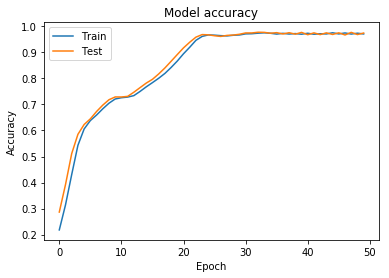

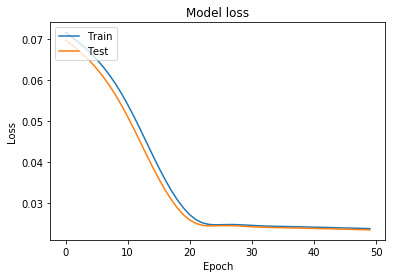

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Standard Imports

In [4]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn
%matplotlib inline
import pandas as pd
import pprint
import math
import random
# from tabulate import tabulate

In [221]:
# Read the data
projectpath = "/home/lokeshmishra/PaleBlueDot/BernPhD/Projects/Terrain_Classifier/terrain_classifier"
df_training_30_2_64_64 = pd.read_pickle(projectpath+'/traincomposite_30_2_64_64.df')
df_training_30_4_64_64 = pd.read_pickle(projectpath+'/traincomposite_30_4_64_64.df')
df_training_30_6_64_64 = pd.read_pickle(projectpath+'/traincomposite_30_6_64_64.df')
df_testing_20_2_64_64 = pd.read_pickle(projectpath+'/testcomposite_20_2_64_64.df')
df_testing_20_4_64_64 = pd.read_pickle(projectpath+'/testcomposite_20_4_64_64.df')
df_testing_20_6_64_64 = pd.read_pickle(projectpath+'/testcomposite_20_6_64_64.df')
dict_dfnames = {0: df_training_30_2_64_64, 1:df_training_30_4_64_64,2:df_training_30_6_64_64}
dict_dfnames_test = {0:df_testing_20_2_64_64, 1:df_testing_20_4_64_64,2:df_testing_20_6_64_64}

### Note
{0: 'Water', 1: 'Mountains', 2: 'Polar_Caps', 3: 'Forest', 4: 'Desert'}

{0: 'train', 1: 'test', 2: 'validation'}

Load the training and testing data into separate numpy arrays, properly randomized!

In [222]:
# Convert Labels for Training set
# The following piece of code works well only when the number of iterations is exactly known!
# This is due to the usage of while loop!

index=[]
iterations = 90
check = []
imagetrain64 = np.zeros((iterations,64,64,3),dtype = 'int')
temp2 = np.zeros((iterations,64,64,1),dtype='int')
labeltrain64 = np.zeros((iterations,64,64,5),dtype = 'int')
#Get random images and put them in an array
while len(index) < iterations:
    a = np.random.randint(0, high=3)
    b = np.random.randint(0, high=30)
    c = len(index)
    
    if ((a,b)) not in check:
        imagetrain64[c,:,:,:]=dict_dfnames[a].iloc[1, b]
        temp2[c,:,:,:]=dict_dfnames[a].iloc[0,b]
        check.append((a,b))
        index.append(c)
# Fix the label array as required by the model
for c in np.arange(iterations):
    for ind1 in np.arange(64):
        for ind2 in np.arange(64):
            if temp2[c,ind1,ind2] == 0:
                labeltrain64[c,ind1,ind2]=[1,0,0,0,0]
            elif temp2[c,ind1,ind2] == 1:
                labeltrain64[c,ind1,ind2]=[0,1,0,0,0]
            elif temp2[c,ind1,ind2] == 2:
                labeltrain64[c,ind1,ind2]=[0,0,1,0,0]
            elif temp2[c,ind1,ind2] == 3:
                labeltrain64[c,ind1,ind2]=[0,0,0,1,0]
            elif temp2[c,ind1,ind2] == 4:
                labeltrain64[c,ind1,ind2]=[0,0,0,0,1]
# print(index)
print(imagetrain64.shape, labeltrain64.shape)

(90, 64, 64, 3) (90, 64, 64, 5)


In [223]:
# Convert Labels for Test SEt
# The following piece of code works well only when the number of iterations is exactly known!
# This is due to the usage of while loop!

index=[]
nfiles=20
iterations = 3*nfiles
check = []
imagetest64 = np.zeros((iterations,64,64,3),dtype = 'int')
temp2 = np.zeros((iterations,64,64,1),dtype='int')
labeltest64 = np.zeros((iterations,64,64,5),dtype = 'int')
#Get random images and put them in an array
while len(index) < iterations:
    a = np.random.randint(0, high=3)
    b = np.random.randint(0, high=nfiles)
    c = len(index)
    
    if ((a,b)) not in check:
        imagetest64[c,:,:,:]=dict_dfnames_test[a].iloc[1, b]
        temp2[c,:,:,:]=dict_dfnames_test[a].iloc[0,b]
        check.append((a,b))
        index.append(c)
# Fix the label array as required by the model
for c in np.arange(iterations):
    for ind1 in np.arange(64):
        for ind2 in np.arange(64):
            if temp2[c,ind1,ind2] == 0:
                labeltest64[c,ind1,ind2]=[1,0,0,0,0]
            elif temp2[c,ind1,ind2] == 1:
                labeltest64[c,ind1,ind2]=[0,1,0,0,0]
            elif temp2[c,ind1,ind2] == 2:
                labeltest64[c,ind1,ind2]=[0,0,1,0,0]
            elif temp2[c,ind1,ind2] == 3:
                labeltest64[c,ind1,ind2]=[0,0,0,1,0]
            elif temp2[c,ind1,ind2] == 4:
                labeltest64[c,ind1,ind2]=[0,0,0,0,1]
# print(index)
print(imagetest64.shape, labeltest64.shape)

(60, 64, 64, 3) (60, 64, 64, 5)


array([[[0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        ...,
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0]],

       [[0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        ...,
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0]],

       [[0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        ...,
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0]],

       ...,

       [[0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        ...,
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0]],

       [[0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        ...,
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0]],

       [[0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        ...,
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0]]

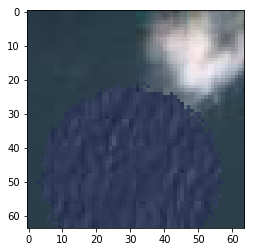

In [224]:
# Sanity check
plt.imshow(imagetrain64[25])
labeltrain64[25]

# Run2
## train - 75 + 15
## test - 60

In [225]:
model2 = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model2.add(Dense(64, activation='relu',input_shape=(64,64,3)))
# Add another:
model2.add(Dense(64, activation='relu'))
# Add another:
model2.add(Dense(64, activation='relu'))
# Add another:
model2.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model2.add(Dense(5, activation='softmax'))

model2.compile(optimizer=Adam(0.001),
              loss='mse',
              metrics=['accuracy'])

In [226]:
training2 = model2.fit(imagetrain64[:75],labeltrain64[:75],validation_data = (imagetrain64[75:],labeltrain64[75:]),epochs=1000,batch_size=15)

Train on 75 samples, validate on 15 samples
Epoch 1/1000
75/75 [==============================] - 1s 8ms/step - loss: 0.2647 - acc: 0.1541 - val_loss: 0.1877 - val_acc: 0.2104
Epoch 2/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1847 - acc: 0.4030 - val_loss: 0.1885 - val_acc: 0.2845
Epoch 3/1000
75/75 [==============================] - 0s 3ms/step - loss: 0.1570 - acc: 0.4457 - val_loss: 0.1998 - val_acc: 0.3424
Epoch 4/1000
75/75 [==============================] - 0s 3ms/step - loss: 0.1510 - acc: 0.4811 - val_loss: 0.1963 - val_acc: 0.2336
Epoch 5/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1503 - acc: 0.5070 - val_loss: 0.1835 - val_acc: 0.4444
Epoch 6/1000
75/75 [==============================] - 0s 3ms/step - loss: 0.1475 - acc: 0.5675 - val_loss: 0.1780 - val_acc: 0.4451
Epoch 7/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1360 - acc: 0.5731 - val_loss: 0.1657 - val_acc: 0.4441
Epoch 8/1000
75/75 [============

75/75 [==============================] - 0s 2ms/step - loss: 0.0390 - acc: 0.8854 - val_loss: 0.0289 - val_acc: 0.9327
Epoch 124/1000
75/75 [==============================] - 0s 3ms/step - loss: 0.0382 - acc: 0.8868 - val_loss: 0.0250 - val_acc: 0.9222
Epoch 125/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0377 - acc: 0.8845 - val_loss: 0.0320 - val_acc: 0.9275
Epoch 126/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0384 - acc: 0.8899 - val_loss: 0.0293 - val_acc: 0.9179
Epoch 127/1000
75/75 [==============================] - 0s 3ms/step - loss: 0.0406 - acc: 0.8746 - val_loss: 0.0320 - val_acc: 0.9288
Epoch 128/1000
75/75 [==============================] - 0s 3ms/step - loss: 0.0345 - acc: 0.9067 - val_loss: 0.0276 - val_acc: 0.9231
Epoch 129/1000
75/75 [==============================] - 0s 3ms/step - loss: 0.0386 - acc: 0.8819 - val_loss: 0.0284 - val_acc: 0.9302
Epoch 130/1000
75/75 [==============================] - 0s 3ms/step - loss: 0

75/75 [==============================] - 0s 2ms/step - loss: 0.0186 - acc: 0.9440 - val_loss: 0.0145 - val_acc: 0.9518
Epoch 246/1000
75/75 [==============================] - 0s 3ms/step - loss: 0.0192 - acc: 0.9420 - val_loss: 0.0144 - val_acc: 0.9519
Epoch 247/1000
75/75 [==============================] - 0s 3ms/step - loss: 0.0174 - acc: 0.9487 - val_loss: 0.0156 - val_acc: 0.9587
Epoch 248/1000
75/75 [==============================] - 0s 3ms/step - loss: 0.0178 - acc: 0.9505 - val_loss: 0.0141 - val_acc: 0.9546
Epoch 249/1000
75/75 [==============================] - 0s 3ms/step - loss: 0.0176 - acc: 0.9453 - val_loss: 0.0153 - val_acc: 0.9499
Epoch 250/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0174 - acc: 0.9499 - val_loss: 0.0168 - val_acc: 0.9554
Epoch 251/1000
75/75 [==============================] - 0s 3ms/step - loss: 0.0180 - acc: 0.9473 - val_loss: 0.0142 - val_acc: 0.9530
Epoch 252/1000
75/75 [==============================] - 0s 3ms/step - loss: 0

KeyboardInterrupt: 

In [ ]:
# Plot training & validation accuracy values
plt.plot(training2.history['acc'])
plt.plot(training2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(training2.history['loss'])
plt.plot(training2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
test2 = model2.evaluate(imagetest64[:],labeltest64[:], batch_size=None, verbose=1, steps=10)
print('The loss is %f and the accuracy is %f' %(test2[0],test2[1]))

In [ ]:
predict = model2.predict(imagetest64[0:1])

In [ ]:
predict[0,1,1]

# Run3
Removed binary structure from labels
## train - 75 + 15
## test - 60

# Run4
## train - 75 + 15 : test - 60
## Improving Accuracy on test!

In [ ]:
model4 = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model4.add(Dense(64, activation='relu',input_shape=(64,64,3)))
# Add another:
model4.add(Dense(64, activation='relu'))
# Add another:
model4.add(Dense(64, activation='relu'))
# Add another:
model4.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model4.add(Dense(5, activation='softmax'))

model4.compile(optimizer=Adam(0.001),
              loss='mse',
              metrics=['accuracy'])

In [ ]:
training4 = model4.fit(imagetrain64[:75],labeltrain64[:75],validation_data = (imagetrain64[75:],labeltrain64[75:]),epochs=1000,batch_size=4096, verbose=2)

In [ ]:
# Plot training & validation accuracy values
plt.plot(training4.history['acc'])
plt.plot(training4.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(training4.history['loss'])
plt.plot(training4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
test4 = model4.evaluate(imagetest64[:],labeltest64[:], batch_size=None, verbose=1, steps=10)
print('The loss is %f and the accuracy is %f' %(test4[0],test4[1]))

In [ ]:
predict = model4.predict(imagetest64[0:1])
predict[0,1,1]

# Run5
## train - 75 + 15 : test - 60
## Improving Accuracy on test!

In [232]:
model5 = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model5.add(Dense(64, activation='relu',input_shape=(64,64,3)))
# Add another:
model5.add(Dense(64, activation='relu'))
# Add another:
model5.add(Dense(64, activation='relu'))
# Add another:
model5.add(Dense(64, activation='relu'))
# Add a softmax layer with output units:
model5.add(Dense(5, activation='softmax'))

model5.compile(optimizer=Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [233]:
training5 = model5.fit(imagetrain64[:75],labeltrain64[:75],validation_data = (imagetrain64[75:],labeltrain64[75:]),epochs=1000,batch_size=4096, verbose=2)

Train on 75 samples, validate on 15 samples
Epoch 1/1000
 - 1s - loss: 6.9629 - acc: 0.2801 - val_loss: 4.7828 - val_acc: 0.1834
Epoch 2/1000
 - 0s - loss: 5.0142 - acc: 0.1552 - val_loss: 5.2294 - val_acc: 0.1254
Epoch 3/1000
 - 0s - loss: 5.5171 - acc: 0.2173 - val_loss: 4.7077 - val_acc: 0.1254
Epoch 4/1000
 - 0s - loss: 5.1265 - acc: 0.2173 - val_loss: 3.5405 - val_acc: 0.1304
Epoch 5/1000
 - 0s - loss: 3.9734 - acc: 0.2194 - val_loss: 2.4557 - val_acc: 0.2430
Epoch 6/1000
 - 0s - loss: 2.8986 - acc: 0.1756 - val_loss: 2.1542 - val_acc: 0.1906
Epoch 7/1000
 - 0s - loss: 2.5486 - acc: 0.1931 - val_loss: 1.5190 - val_acc: 0.2943
Epoch 8/1000
 - 0s - loss: 1.5151 - acc: 0.3286 - val_loss: 1.8849 - val_acc: 0.3412
Epoch 9/1000
 - 0s - loss: 1.6804 - acc: 0.4183 - val_loss: 2.0806 - val_acc: 0.3413
Epoch 10/1000
 - 0s - loss: 1.8004 - acc: 0.4180 - val_loss: 1.8335 - val_acc: 0.4465
Epoch 11/1000
 - 0s - loss: 1.4875 - acc: 0.5574 - val_loss: 1.7592 - val_acc: 0.4463
Epoch 12/1000
 - 0s

Epoch 96/1000
 - 0s - loss: 0.5339 - acc: 0.8248 - val_loss: 0.5421 - val_acc: 0.8316
Epoch 97/1000
 - 0s - loss: 0.5311 - acc: 0.8237 - val_loss: 0.5411 - val_acc: 0.8310
Epoch 98/1000
 - 0s - loss: 0.5286 - acc: 0.8236 - val_loss: 0.5372 - val_acc: 0.8345
Epoch 99/1000
 - 0s - loss: 0.5260 - acc: 0.8265 - val_loss: 0.5329 - val_acc: 0.8393
Epoch 100/1000
 - 0s - loss: 0.5233 - acc: 0.8289 - val_loss: 0.5317 - val_acc: 0.8396
Epoch 101/1000
 - 0s - loss: 0.5206 - acc: 0.8292 - val_loss: 0.5332 - val_acc: 0.8374
Epoch 102/1000
 - 0s - loss: 0.5180 - acc: 0.8283 - val_loss: 0.5335 - val_acc: 0.8346
Epoch 103/1000
 - 0s - loss: 0.5157 - acc: 0.8276 - val_loss: 0.5298 - val_acc: 0.8368
Epoch 104/1000
 - 0s - loss: 0.5130 - acc: 0.8304 - val_loss: 0.5245 - val_acc: 0.8415
Epoch 105/1000
 - 0s - loss: 0.5107 - acc: 0.8331 - val_loss: 0.5218 - val_acc: 0.8424
Epoch 106/1000
 - 0s - loss: 0.5085 - acc: 0.8337 - val_loss: 0.5226 - val_acc: 0.8409
Epoch 107/1000
 - 0s - loss: 0.5064 - acc: 0.83

Epoch 191/1000
 - 0s - loss: 0.3900 - acc: 0.8751 - val_loss: 0.3994 - val_acc: 0.9073
Epoch 192/1000
 - 0s - loss: 0.3889 - acc: 0.8751 - val_loss: 0.3967 - val_acc: 0.9094
Epoch 193/1000
 - 0s - loss: 0.3878 - acc: 0.8755 - val_loss: 0.3966 - val_acc: 0.9097
Epoch 194/1000
 - 0s - loss: 0.3868 - acc: 0.8763 - val_loss: 0.3930 - val_acc: 0.9118
Epoch 195/1000
 - 0s - loss: 0.3856 - acc: 0.8777 - val_loss: 0.3940 - val_acc: 0.9122
Epoch 196/1000
 - 0s - loss: 0.3845 - acc: 0.8794 - val_loss: 0.3952 - val_acc: 0.9110
Epoch 197/1000
 - 0s - loss: 0.3835 - acc: 0.8789 - val_loss: 0.3874 - val_acc: 0.9125
Epoch 198/1000
 - 0s - loss: 0.3824 - acc: 0.8779 - val_loss: 0.3898 - val_acc: 0.9124
Epoch 199/1000
 - 0s - loss: 0.3808 - acc: 0.8786 - val_loss: 0.3893 - val_acc: 0.9127
Epoch 200/1000
 - 0s - loss: 0.3794 - acc: 0.8838 - val_loss: 0.3865 - val_acc: 0.9130
Epoch 201/1000
 - 0s - loss: 0.3779 - acc: 0.8841 - val_loss: 0.3901 - val_acc: 0.9116
Epoch 202/1000
 - 0s - loss: 0.3767 - acc: 

 - 0s - loss: 0.2984 - acc: 0.9121 - val_loss: 0.2782 - val_acc: 0.9183
Epoch 286/1000
 - 0s - loss: 0.3285 - acc: 0.8888 - val_loss: 0.3613 - val_acc: 0.9278
Epoch 287/1000
 - 0s - loss: 0.3257 - acc: 0.9240 - val_loss: 0.2886 - val_acc: 0.9295
Epoch 288/1000
 - 0s - loss: 0.2907 - acc: 0.9132 - val_loss: 0.2811 - val_acc: 0.9260
Epoch 289/1000
 - 0s - loss: 0.2998 - acc: 0.9000 - val_loss: 0.3622 - val_acc: 0.9212
Epoch 290/1000
 - 0s - loss: 0.3201 - acc: 0.9215 - val_loss: 0.2834 - val_acc: 0.9287
Epoch 291/1000
 - 0s - loss: 0.2951 - acc: 0.8998 - val_loss: 0.2822 - val_acc: 0.9301
Epoch 292/1000
 - 0s - loss: 0.2925 - acc: 0.9025 - val_loss: 0.3468 - val_acc: 0.9274
Epoch 293/1000
 - 0s - loss: 0.3089 - acc: 0.9277 - val_loss: 0.2829 - val_acc: 0.9291
Epoch 294/1000
 - 0s - loss: 0.2914 - acc: 0.9106 - val_loss: 0.2883 - val_acc: 0.9318
Epoch 295/1000
 - 0s - loss: 0.2843 - acc: 0.9172 - val_loss: 0.3280 - val_acc: 0.9322
Epoch 296/1000
 - 0s - loss: 0.2956 - acc: 0.9283 - val_lo

Epoch 380/1000
 - 0s - loss: 0.2290 - acc: 0.9305 - val_loss: 0.2435 - val_acc: 0.9424
Epoch 381/1000
 - 0s - loss: 0.2296 - acc: 0.9409 - val_loss: 0.2219 - val_acc: 0.9403
Epoch 382/1000
 - 0s - loss: 0.2298 - acc: 0.9278 - val_loss: 0.2446 - val_acc: 0.9421
Epoch 383/1000
 - 0s - loss: 0.2300 - acc: 0.9414 - val_loss: 0.2214 - val_acc: 0.9421
Epoch 384/1000
 - 0s - loss: 0.2290 - acc: 0.9282 - val_loss: 0.2425 - val_acc: 0.9426
Epoch 385/1000
 - 0s - loss: 0.2283 - acc: 0.9416 - val_loss: 0.2202 - val_acc: 0.9414
Epoch 386/1000
 - 0s - loss: 0.2262 - acc: 0.9300 - val_loss: 0.2335 - val_acc: 0.9443
Epoch 387/1000
 - 0s - loss: 0.2245 - acc: 0.9409 - val_loss: 0.2203 - val_acc: 0.9419
Epoch 388/1000
 - 0s - loss: 0.2229 - acc: 0.9339 - val_loss: 0.2268 - val_acc: 0.9453
Epoch 389/1000
 - 0s - loss: 0.2217 - acc: 0.9403 - val_loss: 0.2214 - val_acc: 0.9444
Epoch 390/1000
 - 0s - loss: 0.2208 - acc: 0.9370 - val_loss: 0.2215 - val_acc: 0.9459
Epoch 391/1000
 - 0s - loss: 0.2200 - acc: 

 - 0s - loss: 0.2608 - acc: 0.9264 - val_loss: 0.2498 - val_acc: 0.9385
Epoch 475/1000
 - 0s - loss: 0.2539 - acc: 0.9215 - val_loss: 0.2405 - val_acc: 0.9372
Epoch 476/1000
 - 0s - loss: 0.2520 - acc: 0.9147 - val_loss: 0.2448 - val_acc: 0.9354
Epoch 477/1000
 - 0s - loss: 0.2496 - acc: 0.9162 - val_loss: 0.2529 - val_acc: 0.9359
Epoch 478/1000
 - 0s - loss: 0.2478 - acc: 0.9246 - val_loss: 0.2491 - val_acc: 0.9372
Epoch 479/1000
 - 0s - loss: 0.2428 - acc: 0.9268 - val_loss: 0.2400 - val_acc: 0.9368
Epoch 480/1000
 - 0s - loss: 0.2391 - acc: 0.9269 - val_loss: 0.2404 - val_acc: 0.9347
Epoch 481/1000
 - 0s - loss: 0.2419 - acc: 0.9275 - val_loss: 0.2463 - val_acc: 0.9353
Epoch 482/1000
 - 0s - loss: 0.2403 - acc: 0.9346 - val_loss: 0.2510 - val_acc: 0.9370
Epoch 483/1000
 - 0s - loss: 0.2399 - acc: 0.9380 - val_loss: 0.2424 - val_acc: 0.9375
Epoch 484/1000
 - 0s - loss: 0.2356 - acc: 0.9373 - val_loss: 0.2311 - val_acc: 0.9384
Epoch 485/1000
 - 0s - loss: 0.2340 - acc: 0.9311 - val_lo

Epoch 569/1000
 - 0s - loss: 0.1899 - acc: 0.9480 - val_loss: 0.1938 - val_acc: 0.9517
Epoch 570/1000
 - 0s - loss: 0.1897 - acc: 0.9468 - val_loss: 0.1967 - val_acc: 0.9514
Epoch 571/1000
 - 0s - loss: 0.1893 - acc: 0.9482 - val_loss: 0.1942 - val_acc: 0.9517
Epoch 572/1000
 - 0s - loss: 0.1889 - acc: 0.9473 - val_loss: 0.1941 - val_acc: 0.9518
Epoch 573/1000
 - 0s - loss: 0.1885 - acc: 0.9477 - val_loss: 0.1948 - val_acc: 0.9518
Epoch 574/1000
 - 0s - loss: 0.1882 - acc: 0.9482 - val_loss: 0.1917 - val_acc: 0.9521
Epoch 575/1000
 - 0s - loss: 0.1880 - acc: 0.9471 - val_loss: 0.1951 - val_acc: 0.9517
Epoch 576/1000
 - 0s - loss: 0.1876 - acc: 0.9485 - val_loss: 0.1919 - val_acc: 0.9519
Epoch 577/1000
 - 0s - loss: 0.1870 - acc: 0.9475 - val_loss: 0.1920 - val_acc: 0.9520
Epoch 578/1000
 - 0s - loss: 0.1865 - acc: 0.9477 - val_loss: 0.1936 - val_acc: 0.9519
Epoch 579/1000
 - 0s - loss: 0.1863 - acc: 0.9484 - val_loss: 0.1907 - val_acc: 0.9519
Epoch 580/1000
 - 0s - loss: 0.1860 - acc: 

 - 0s - loss: 0.1640 - acc: 0.9506 - val_loss: 0.1689 - val_acc: 0.9542
Epoch 664/1000
 - 0s - loss: 0.1639 - acc: 0.9511 - val_loss: 0.1671 - val_acc: 0.9543
Epoch 665/1000
 - 0s - loss: 0.1638 - acc: 0.9503 - val_loss: 0.1693 - val_acc: 0.9535
Epoch 666/1000
 - 0s - loss: 0.1637 - acc: 0.9516 - val_loss: 0.1662 - val_acc: 0.9543
Epoch 667/1000
 - 0s - loss: 0.1635 - acc: 0.9503 - val_loss: 0.1678 - val_acc: 0.9543
Epoch 668/1000
 - 0s - loss: 0.1632 - acc: 0.9511 - val_loss: 0.1661 - val_acc: 0.9544
Epoch 669/1000
 - 0s - loss: 0.1630 - acc: 0.9507 - val_loss: 0.1659 - val_acc: 0.9546
Epoch 670/1000
 - 0s - loss: 0.1628 - acc: 0.9511 - val_loss: 0.1661 - val_acc: 0.9547
Epoch 671/1000
 - 0s - loss: 0.1626 - acc: 0.9512 - val_loss: 0.1649 - val_acc: 0.9549
Epoch 672/1000
 - 0s - loss: 0.1624 - acc: 0.9508 - val_loss: 0.1664 - val_acc: 0.9551
Epoch 673/1000
 - 0s - loss: 0.1623 - acc: 0.9514 - val_loss: 0.1644 - val_acc: 0.9556
Epoch 674/1000
 - 0s - loss: 0.1621 - acc: 0.9509 - val_lo

Epoch 758/1000
 - 0s - loss: 0.2918 - acc: 0.9255 - val_loss: 0.3697 - val_acc: 0.9059
Epoch 759/1000
 - 0s - loss: 0.3411 - acc: 0.9072 - val_loss: 0.1899 - val_acc: 0.9643
Epoch 760/1000
 - 0s - loss: 0.1948 - acc: 0.9443 - val_loss: 0.3647 - val_acc: 0.8466
Epoch 761/1000
 - 0s - loss: 0.5267 - acc: 0.7646 - val_loss: 0.8809 - val_acc: 0.6906
Epoch 762/1000
 - 0s - loss: 0.7491 - acc: 0.7287 - val_loss: 0.5989 - val_acc: 0.8124
Epoch 763/1000
 - 0s - loss: 0.5322 - acc: 0.8414 - val_loss: 0.4957 - val_acc: 0.8283
Epoch 764/1000
 - 0s - loss: 0.6032 - acc: 0.8157 - val_loss: 0.3767 - val_acc: 0.8883
Epoch 765/1000
 - 0s - loss: 0.6396 - acc: 0.8482 - val_loss: 0.3135 - val_acc: 0.9483
Epoch 766/1000
 - 0s - loss: 0.6131 - acc: 0.8677 - val_loss: 0.2967 - val_acc: 0.9472
Epoch 767/1000
 - 0s - loss: 0.4973 - acc: 0.8652 - val_loss: 0.2992 - val_acc: 0.9602
Epoch 768/1000
 - 0s - loss: 0.3652 - acc: 0.9023 - val_loss: 0.4720 - val_acc: 0.7916
Epoch 769/1000
 - 0s - loss: 0.4961 - acc: 

 - 0s - loss: 0.1603 - acc: 0.9545 - val_loss: 0.1587 - val_acc: 0.9710
Epoch 853/1000
 - 0s - loss: 0.1601 - acc: 0.9548 - val_loss: 0.1580 - val_acc: 0.9709
Epoch 854/1000
 - 0s - loss: 0.1599 - acc: 0.9547 - val_loss: 0.1567 - val_acc: 0.9709
Epoch 855/1000
 - 0s - loss: 0.1597 - acc: 0.9546 - val_loss: 0.1563 - val_acc: 0.9710
Epoch 856/1000
 - 0s - loss: 0.1595 - acc: 0.9547 - val_loss: 0.1568 - val_acc: 0.9711
Epoch 857/1000
 - 0s - loss: 0.1592 - acc: 0.9548 - val_loss: 0.1567 - val_acc: 0.9714
Epoch 858/1000
 - 0s - loss: 0.1590 - acc: 0.9544 - val_loss: 0.1555 - val_acc: 0.9713
Epoch 859/1000
 - 0s - loss: 0.1588 - acc: 0.9548 - val_loss: 0.1543 - val_acc: 0.9712
Epoch 860/1000
 - 0s - loss: 0.1586 - acc: 0.9546 - val_loss: 0.1543 - val_acc: 0.9713
Epoch 861/1000
 - 0s - loss: 0.1584 - acc: 0.9547 - val_loss: 0.1548 - val_acc: 0.9715
Epoch 862/1000
 - 0s - loss: 0.1582 - acc: 0.9549 - val_loss: 0.1546 - val_acc: 0.9715
Epoch 863/1000
 - 0s - loss: 0.1580 - acc: 0.9549 - val_lo

Epoch 947/1000
 - 0s - loss: 0.1454 - acc: 0.9563 - val_loss: 0.1425 - val_acc: 0.9729
Epoch 948/1000
 - 0s - loss: 0.1453 - acc: 0.9563 - val_loss: 0.1433 - val_acc: 0.9731
Epoch 949/1000
 - 0s - loss: 0.1452 - acc: 0.9562 - val_loss: 0.1434 - val_acc: 0.9729
Epoch 950/1000
 - 0s - loss: 0.1450 - acc: 0.9565 - val_loss: 0.1430 - val_acc: 0.9729
Epoch 951/1000
 - 0s - loss: 0.1449 - acc: 0.9565 - val_loss: 0.1429 - val_acc: 0.9730
Epoch 952/1000
 - 0s - loss: 0.1449 - acc: 0.9563 - val_loss: 0.1426 - val_acc: 0.9729
Epoch 953/1000
 - 0s - loss: 0.1447 - acc: 0.9565 - val_loss: 0.1434 - val_acc: 0.9730
Epoch 954/1000
 - 0s - loss: 0.1446 - acc: 0.9566 - val_loss: 0.1434 - val_acc: 0.9732
Epoch 955/1000
 - 0s - loss: 0.1445 - acc: 0.9564 - val_loss: 0.1421 - val_acc: 0.9730
Epoch 956/1000
 - 0s - loss: 0.1444 - acc: 0.9565 - val_loss: 0.1425 - val_acc: 0.9732
Epoch 957/1000
 - 0s - loss: 0.1442 - acc: 0.9563 - val_loss: 0.1431 - val_acc: 0.9732
Epoch 958/1000
 - 0s - loss: 0.1441 - acc: 

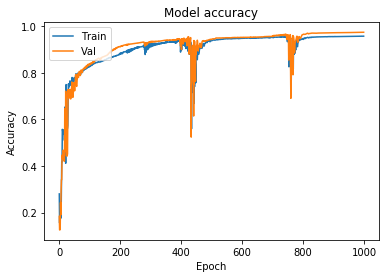

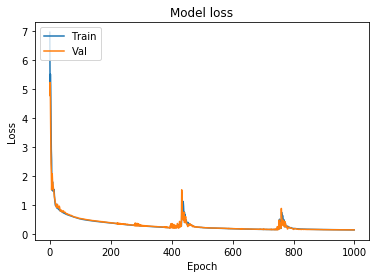

In [234]:
# Plot training & validation accuracy values
plt.plot(training5.history['acc'])
plt.plot(training5.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(training5.history['loss'])
plt.plot(training5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [235]:
test5 = model5.evaluate(imagetest64[:],labeltest64[:], batch_size=None, verbose=1, steps=10)
print('The loss is %f and the accuracy is %f' %(test5[0],test5[1]))

10/10 [==============================] - 1s 64ms/step
The loss is 0.464163 and the accuracy is 0.865047


In [236]:
predict = model5.predict(imagetest64[0:1])
predict[0,1,1]

array([1.08704626e-06, 1.59022491e-02, 9.72242653e-01, 1.13552585e-02,
       4.98768466e-04], dtype=float32)

### Note
{0: 'Water', 1: 'Mountains', 2: 'Polar_Caps', 3: 'Forest', 4: 'Desert'}

{0: 'train', 1: 'test', 2: 'validation'}

# Visually check the predictions

In [237]:
imagetest64.shape, labeltest64.shape

((60, 64, 64, 3), (60, 64, 64, 5))

In [238]:
predictedlabels64 = model5.predict(imagetest64[:])

In [239]:
iterations = 60
predictedlabelstest64 = np.zeros((iterations,64,64,1),dtype = 'int')
predictedlabelstestrgb64 = np.zeros((iterations,64,64,3),dtype = 'int')
testrgb64 = np.zeros((iterations,64,64,3),dtype = 'int')
for nimage in np.arange(iterations):
    for ind1 in np.arange(64):
        for ind2 in np.arange(64):
            maxval = np.amax(predictedlabels64[nimage,ind1,ind2])
            for nclass in np.arange(5):
                if predictedlabels64[nimage,ind1,ind2][nclass] == maxval:
                    predictedlabelstest64[nimage,ind1,ind2] = nclass
            # Color the predictions for visualization
            if predictedlabelstest64[nimage,ind1,ind2]==0:
                predictedlabelstestrgb64[nimage,ind1,ind2] = np.array([51, 102, 255]) # blue
            elif predictedlabelstest64[nimage,ind1,ind2]==1:
                predictedlabelstestrgb64[nimage,ind1,ind2] = np.array([102, 153, 153])
            elif predictedlabelstest64[nimage,ind1,ind2]==2:
                predictedlabelstestrgb64[nimage,ind1,ind2] = np.array([255, 255, 255])
            elif predictedlabelstest64[nimage,ind1,ind2]==3:
                predictedlabelstestrgb64[nimage,ind1,ind2] = np.array([0, 204, 0])
            elif predictedlabelstest64[nimage,ind1,ind2]==4:
                predictedlabelstestrgb64[nimage,ind1,ind2] = np.array([255, 153, 0])
            # do the same for original testing images for easier comparison
            if np.array_equal(labeltest64[nimage,ind1,ind2],[1,0,0,0,0]):
                testrgb64[nimage,ind1,ind2] = np.array([51, 102, 255])
            elif np.array_equal(labeltest64[nimage,ind1,ind2],[0,1,0,0,0]):
                testrgb64[nimage,ind1,ind2] = np.array([102, 153, 153])
            elif np.array_equal(labeltest64[nimage,ind1,ind2],[0,0,1,0,0]):
                testrgb64[nimage,ind1,ind2] = np.array([255, 255, 255])
            elif np.array_equal(labeltest64[nimage,ind1,ind2],[0,0,0,1,0]):
                testrgb64[nimage,ind1,ind2] = np.array([0, 204, 0])
            elif np.array_equal(labeltest64[nimage,ind1,ind2],[0,0,0,0,1]):
                testrgb64[nimage,ind1,ind2] = np.array([255, 153, 0])            

predictedlabelstest64.shape,predictedlabelstestrgb64.shape,testrgb64.shape

((60, 64, 64, 1), (60, 64, 64, 3), (60, 64, 64, 3))

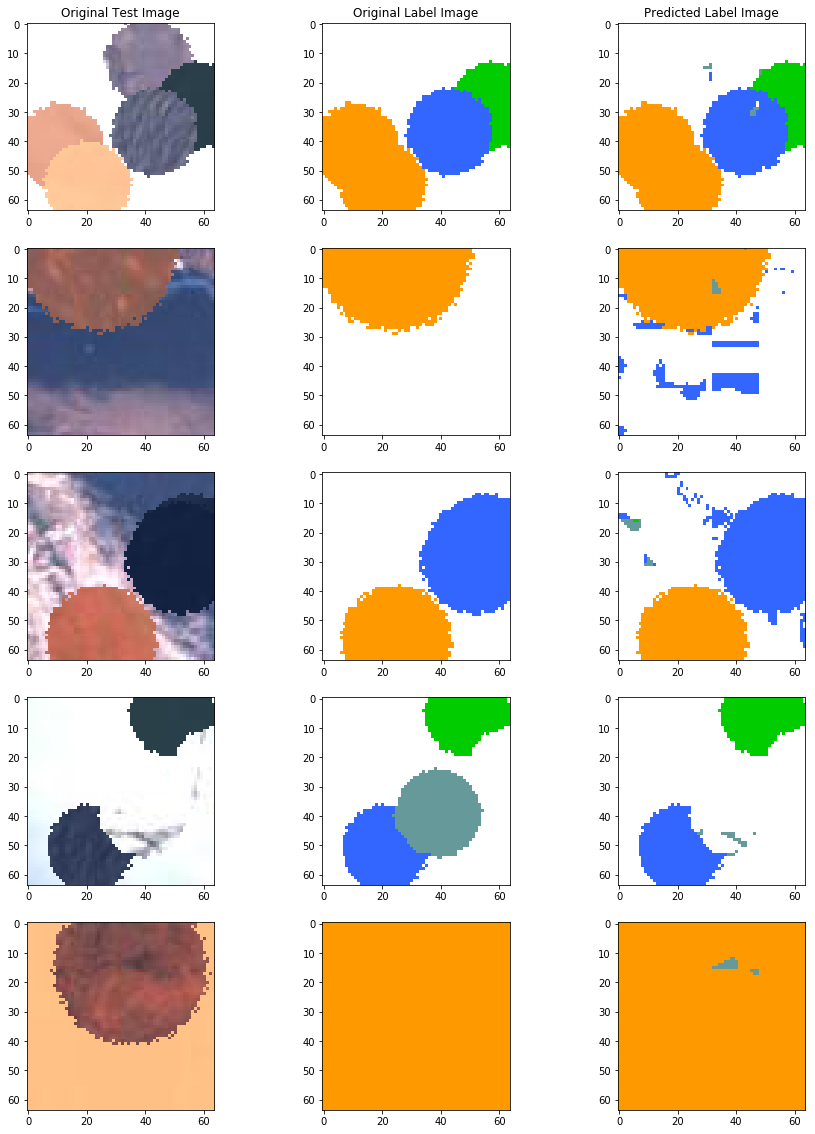

In [240]:
fig = plt.figure(figsize=(15,20))

ax0 = fig.add_subplot(531)
plt.imshow(imagetest64[0])
ax0.set_title('Original Test Image')

ax1 = fig.add_subplot(532)
plt.imshow(testrgb64[0])
ax1.set_title('Original Label Image')

ax2 = fig.add_subplot(533)
plt.imshow(predictedlabelstestrgb64[0])
ax2.set_title('Predicted Label Image')
#
fig.add_subplot(534)
plt.imshow(imagetest64[1])

fig.add_subplot(535)
plt.imshow(testrgb64[1])

fig.add_subplot(536)
plt.imshow(predictedlabelstestrgb64[1])
#

fig.add_subplot(537)
plt.imshow(imagetest64[2])

fig.add_subplot(538)
plt.imshow(testrgb64[2])

fig.add_subplot(539)
plt.imshow(predictedlabelstestrgb64[2])
#
fig.add_subplot(5,3,10)
plt.imshow(imagetest64[3])

fig.add_subplot(5,3,11)
plt.imshow(testrgb64[3])

fig.add_subplot(5,3,12)
plt.imshow(predictedlabelstestrgb64[3])
#

fig.add_subplot(5,3,13)
plt.imshow(imagetest64[4])

fig.add_subplot(5,3,14)
plt.imshow(testrgb64[4])

fig.add_subplot(5,3,15)
plt.imshow(predictedlabelstestrgb64[4])

# Running on 512x512 images

In [5]:
def plot_confusion_matrix(y_true, y_pred, normalize=False, title=None, cmap=plt.cm.Blues,figuresize=(10,10)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    classes = ['Desert', 'Mountains', 'Forest','Water','Polar Caps']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=figuresize)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.figure
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
#     fig.tight_layout()
    return ax

In [6]:
projectpath = "/home/lokeshmishra/PaleBlueDot/BernPhD/Projects/Terrain_Classifier/terrain_classifier"
df_training_50_2_512_512 = pd.read_pickle(projectpath+'/traincomposite_50_2_512_512.df')
df_training_50_4_512_512 = pd.read_pickle(projectpath+'/traincomposite_50_4_512_512.df')
df_training_50_6_512_512 = pd.read_pickle(projectpath+'/traincomposite_50_6_512_512.df')
df_testing_30_2_512_512 = pd.read_pickle(projectpath+'/testcomposite_30_2_512_512.df')
df_testing_30_4_512_512 = pd.read_pickle(projectpath+'/testcomposite_30_4_512_512.df')
df_testing_30_6_512_512 = pd.read_pickle(projectpath+'/testcomposite_30_6_512_512.df')
dict_dfnames = {0: df_training_50_2_512_512, 1:df_training_50_4_512_512,2:df_training_50_6_512_512}
dict_dfnames_test = {0:df_testing_30_2_512_512, 1:df_testing_30_4_512_512,2:df_testing_30_6_512_512}

## First create numpy array of training samples

In [7]:
# The following piece of code works well only when the number of iterations is exactly known!
# This is due to the usage of while loop!

index=[]
iterations = 150
nfiles = 50
size = 512
check = []
imagetrain512 = np.zeros((iterations,size,size,3),dtype = 'int')
temp2 = np.zeros((iterations,size,size,1),dtype='int')
labeltrain512 = np.zeros((iterations,size,size,5),dtype = 'int')
#Get random images and put them in an array
while len(index) < iterations:
    a = np.random.randint(0, high=3)
    b = np.random.randint(0, high=nfiles)
    c = len(index)
    
    if ((a,b)) not in check:
        imagetrain512[c,:,:,:]=dict_dfnames[a].iloc[1, b]
        temp2[c,:,:,:]=dict_dfnames[a].iloc[0,b]
        check.append((a,b))
        index.append(c)
print('Done with part 1')
# Fix the label array as required by the model
for c in np.arange(iterations):
    for ind1 in np.arange(size):
        for ind2 in np.arange(size):
            if temp2[c,ind1,ind2] == 0:
                labeltrain512[c,ind1,ind2]=[1,0,0,0,0]
            elif temp2[c,ind1,ind2] == 1:
                labeltrain512[c,ind1,ind2]=[0,1,0,0,0]
            elif temp2[c,ind1,ind2] == 2:
                labeltrain512[c,ind1,ind2]=[0,0,1,0,0]
            elif temp2[c,ind1,ind2] == 3:
                labeltrain512[c,ind1,ind2]=[0,0,0,1,0]
            elif temp2[c,ind1,ind2] == 4:
                labeltrain512[c,ind1,ind2]=[0,0,0,0,1]
# print(index)
print(imagetrain512.shape, labeltrain512.shape)

Done with part 1
(150, 512, 512, 3) (150, 512, 512, 5)


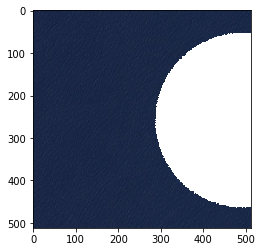

In [8]:
#Sanity check

plt.imshow(imagetrain512[11])

## Create numpy array for testing samples

In [9]:
# The following piece of code works well only when the number of iterations is exactly known!
# This is due to the usage of while loop!

index=[]
nfiles = 30
iterations = nfiles*3
size = 512
check = []
imagetest512 = np.zeros((iterations,size,size,3),dtype = 'int')
temp2 = np.zeros((iterations,size,size,1),dtype='int')
labeltest512 = np.zeros((iterations,size,size,5),dtype = 'int')
#Get random images and put them in an array
while len(index) < iterations:
    a = np.random.randint(0, high=3)
    b = np.random.randint(0, high=nfiles)
    c = len(index)
    
    if ((a,b)) not in check:
        imagetest512[c,:,:,:]=dict_dfnames[a].iloc[1, b]
        temp2[c,:,:,:]=dict_dfnames[a].iloc[0,b]
        check.append((a,b))
        index.append(c)
#         print('Current run number is %d of %d'%(len(index),iterations))
print('Done with part 1')
# Fix the label array as required by the model
for c in np.arange(iterations):
    for ind1 in np.arange(size):
        for ind2 in np.arange(size):
            if temp2[c,ind1,ind2] == 0:
                labeltest512[c,ind1,ind2]=[1,0,0,0,0]
            elif temp2[c,ind1,ind2] == 1:
                labeltest512[c,ind1,ind2]=[0,1,0,0,0]
            elif temp2[c,ind1,ind2] == 2:
                labeltest512[c,ind1,ind2]=[0,0,1,0,0]
            elif temp2[c,ind1,ind2] == 3:
                labeltest512[c,ind1,ind2]=[0,0,0,1,0]
            elif temp2[c,ind1,ind2] == 4:
                labeltest512[c,ind1,ind2]=[0,0,0,0,1]
# print(index)
print(imagetest512.shape, labeltest512.shape)

Done with part 1
(90, 512, 512, 3) (90, 512, 512, 5)


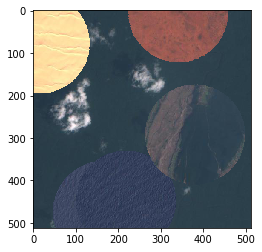

In [10]:
#Sanity check

plt.imshow(imagetest512[11])

# Now we have 150 training samples and 90 testing sample. They are made of 3 types of images of 2,4 and 6 terrains.

# Define the model

In [3]:
model512_1 = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model512_1.add(Dense(64, activation='relu',input_shape=(512,512,3)))
# Add another:
model512_1.add(Dense(64, activation='relu'))
# Add another:
model512_1.add(Dense(64, activation='relu'))
# Add another:
model512_1.add(Dense(64, activation='relu'))
# Add a softmax layer with output units:
model512_1.add(Dense(5, activation='softmax'))

model512_1.compile(optimizer=Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
print(model512_1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512, 512, 64)      256       
_________________________________________________________________
dense_2 (Dense)              (None, 512, 512, 64)      4160      
_________________________________________________________________
dense_3 (Dense)              (None, 512, 512, 64)      4160      
_________________________________________________________________
dense_4 (Dense)              (None, 512, 512, 64)      4160      
_________________________________________________________________
dense_5 (Dense)              (None, 512, 512, 5)       325       
Total params: 13,061
Trainable params: 13,061
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
from keras.utils.vis_utils import plot_model
plot_model(model512_1, to_file='model.png', show_shapes=True,show_layer_names=True, dpi=300)

TypeError: plot_model() got an unexpected keyword argument 'dpi'

In [25]:
training512_1 = model512_1.fit(imagetrain512[:100],labeltrain512[:100],validation_data = (imagetrain512[100:],labeltrain512[100:]),epochs=10,batch_size=4, verbose=1)

Train on 100 samples, validate on 50 samples
Epoch 1/10
100/100 [==============================] - 17s 170ms/step - loss: 4.4071 - acc: 0.3494 - val_loss: 1.0226 - val_acc: 0.6081
Epoch 2/10
100/100 [==============================] - 17s 166ms/step - loss: 0.9787 - acc: 0.6246 - val_loss: 0.7789 - val_acc: 0.6815
Epoch 3/10
100/100 [==============================] - 17s 167ms/step - loss: 0.8669 - acc: 0.6788 - val_loss: 0.8395 - val_acc: 0.6188
Epoch 4/10
100/100 [==============================] - 17s 168ms/step - loss: 0.7612 - acc: 0.7386 - val_loss: 0.7619 - val_acc: 0.7306
Epoch 5/10
100/100 [==============================] - 17s 167ms/step - loss: 0.8334 - acc: 0.6887 - val_loss: 0.7719 - val_acc: 0.7110
Epoch 6/10
100/100 [==============================] - 17s 167ms/step - loss: 0.7611 - acc: 0.7455 - val_loss: 0.6522 - val_acc: 0.7353
Epoch 7/10
100/100 [==============================] - 17s 167ms/step - loss: 0.7644 - acc: 0.7176 - val_loss: 1.4957 - val_acc: 0.7109
Epoch 8/10

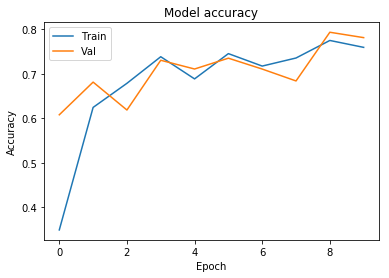

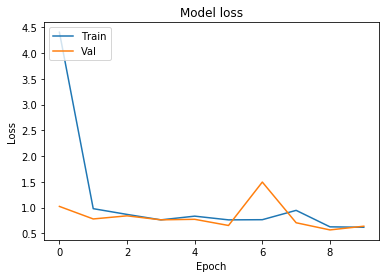

In [26]:
# Plot training & validation accuracy values
plt.plot(training512_1.history['acc'])
plt.plot(training512_1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(training512_1.history['loss'])
plt.plot(training512_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [29]:
test512_1 = model512_1.evaluate(imagetest512[:],labeltest512[:], batch_size=4, verbose=1)
print('The loss is %f and the accuracy is %f' %(test512_1[0],test512_1[1]))

90/90 [==============================] - 5s 61ms/step
The loss is 0.587167 and the accuracy is 0.813337


## Optimize Learning Rate, Layers

In [36]:
model512_2 = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model512_2.add(Dense(64, activation='relu',input_shape=(512,512,3)))
# Add another:
model512_2.add(Dense(64, activation='relu'))
# Add another:
model512_2.add(Dense(64, activation='relu'))
# Add another:
model512_2.add(Dense(64, activation='relu'))
# Add a softmax layer with output units:
model512_2.add(Dense(5, activation='softmax'))

model512_2.compile(optimizer=Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
training512_2 = model512_2.fit(imagetrain512[:100],labeltrain512[:100],validation_data = (imagetrain512[100:],labeltrain512[100:]),epochs=100,batch_size=4, verbose=1)

Train on 100 samples, validate on 50 samples
Epoch 1/100
100/100 [==============================] - 17s 175ms/step - loss: 1.5430 - acc: 0.5221 - val_loss: 0.9677 - val_acc: 0.5651
Epoch 2/100
100/100 [==============================] - 17s 172ms/step - loss: 0.8848 - acc: 0.6643 - val_loss: 0.7858 - val_acc: 0.7089
Epoch 3/100
100/100 [==============================] - 17s 173ms/step - loss: 0.8067 - acc: 0.7033 - val_loss: 1.0281 - val_acc: 0.6933
Epoch 4/100
100/100 [==============================] - 17s 173ms/step - loss: 0.7168 - acc: 0.7426 - val_loss: 0.7963 - val_acc: 0.6583
Epoch 5/100
100/100 [==============================] - 17s 173ms/step - loss: 0.6763 - acc: 0.7355 - val_loss: 0.6136 - val_acc: 0.7850
Epoch 6/100
100/100 [==============================] - 17s 173ms/step - loss: 0.6484 - acc: 0.7342 - val_loss: 0.7009 - val_acc: 0.6450
Epoch 7/100
100/100 [==============================] - 17s 173ms/step - loss: 0.6668 - acc: 0.7154 - val_loss: 0.6056 - val_acc: 0.7552
Epo

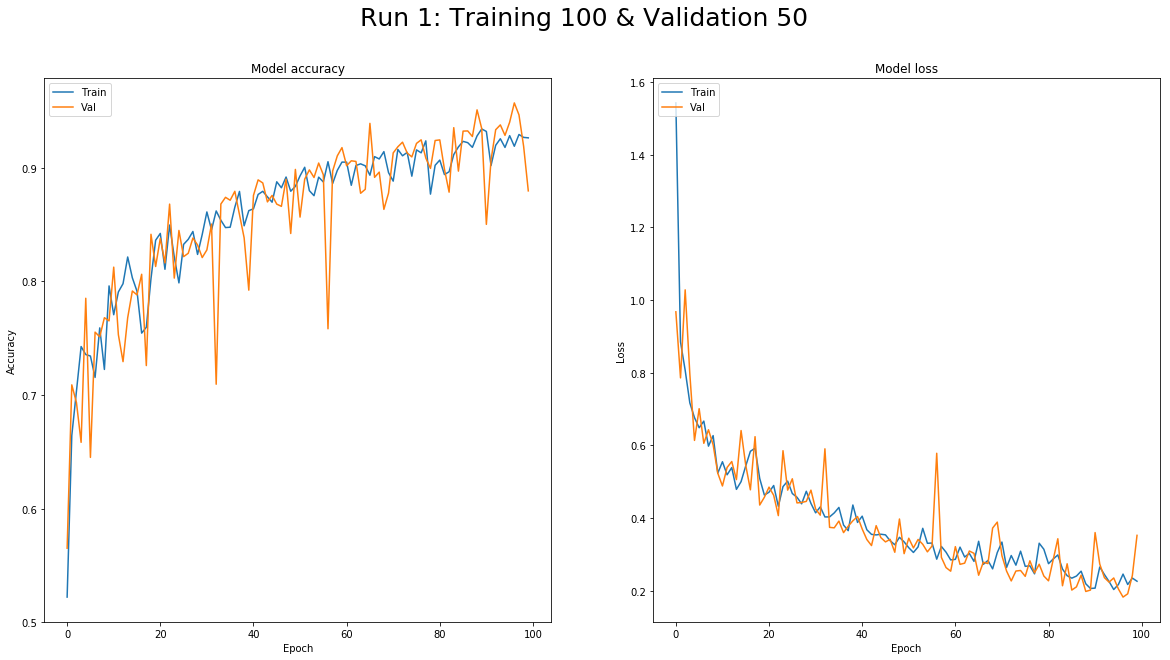

In [172]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Run 1: Training 100 & Validation 50', fontsize = 25)
# Plot training & validation accuracy values
fig.add_subplot(121)
plt.plot(training512_2.history['acc'])
plt.plot(training512_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')


# Plot training & validation loss values
fig.add_subplot(122)
plt.plot(training512_2.history['loss'])
plt.plot(training512_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


fig.savefig(projectpath+'/512by512/'+'run1.png',dpi=600)

In [44]:
test512_2 = model512_2.evaluate(imagetest512[:],labeltest512[:], batch_size=4, verbose=1)
print('The loss is %f and the accuracy is %f' %(test512_2[0],test512_2[1]))

90/90 [==============================] - 6s 61ms/step
The loss is 0.371725 and the accuracy is 0.870965


In [45]:
# Let's save this model:
model512_2.save(projectpath+'/model512_2a.h5')

## Continue training to improve further? (reduce learning rate)

In [46]:
model512_2.compile(optimizer=Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
training512_2b = model512_2.fit(imagetrain512[:120],labeltrain512[:120],validation_data = (imagetrain512[120:],labeltrain512[120:]),epochs=50,batch_size=4, verbose=1)

Train on 120 samples, validate on 30 samples
Epoch 1/50
120/120 [==============================] - 19s 155ms/step - loss: 0.2613 - acc: 0.9079 - val_loss: 0.1743 - val_acc: 0.9441
Epoch 2/50
120/120 [==============================] - 18s 153ms/step - loss: 0.1881 - acc: 0.9372 - val_loss: 0.1687 - val_acc: 0.9513
Epoch 3/50
120/120 [==============================] - 19s 155ms/step - loss: 0.1839 - acc: 0.9374 - val_loss: 0.1640 - val_acc: 0.9537
Epoch 4/50
120/120 [==============================] - 19s 159ms/step - loss: 0.1803 - acc: 0.9387 - val_loss: 0.1579 - val_acc: 0.9566
Epoch 5/50
120/120 [==============================] - 19s 156ms/step - loss: 0.1792 - acc: 0.9386 - val_loss: 0.1531 - val_acc: 0.9567
Epoch 6/50
120/120 [==============================] - 19s 155ms/step - loss: 0.1768 - acc: 0.9400 - val_loss: 0.1465 - val_acc: 0.9587
Epoch 7/50
120/120 [==============================] - 19s 158ms/step - loss: 0.1816 - acc: 0.9366 - val_loss: 0.1563 - val_acc: 0.9578
Epoch 8/50

In [48]:
test512_2b = model512_2.evaluate(imagetest512[:],labeltest512[:], batch_size=4, verbose=1)
print('The loss is %f and the accuracy is %f' %(test512_2b[0],test512_2b[1]))

90/90 [==============================] - 6s 62ms/step
The loss is 0.147736 and the accuracy is 0.951117


In [49]:
# Let's save this model:
model512_2.save(projectpath+'/model512_2b.h5')

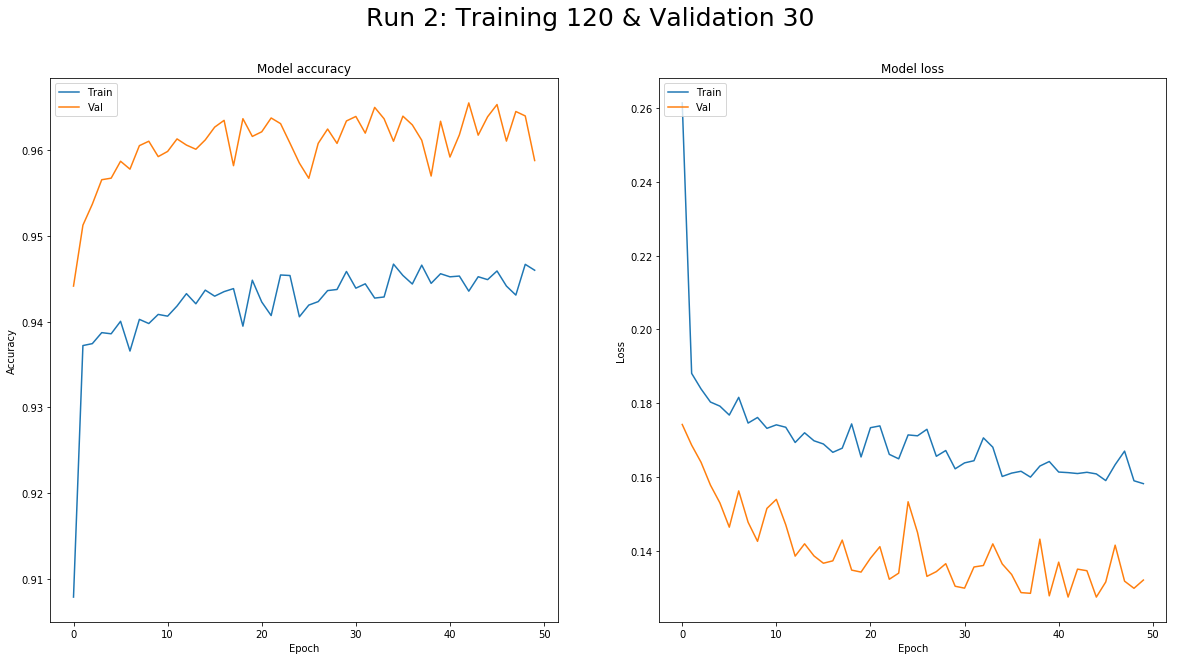

In [174]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Run 2: Training 120 & Validation 30', fontsize = 25)
# Plot training & validation accuracy values
fig.add_subplot(121)
plt.plot(training512_2b.history['acc'])
plt.plot(training512_2b.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')


# Plot training & validation loss values
fig.add_subplot(122)
plt.plot(training512_2b.history['loss'])
plt.plot(training512_2b.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

fig.savefig(projectpath+'/512by512/'+'run2.png',dpi=600)

## Continue training to improve further? (reduce learning rate)

In [51]:
model512_2.compile(optimizer=Adam(0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
training512_2c = model512_2.fit(imagetrain512[:120],labeltrain512[:120],validation_data = (imagetrain512[120:],labeltrain512[120:]),epochs=50,batch_size=4, verbose=1)

Train on 120 samples, validate on 30 samples
Epoch 1/50
120/120 [==============================] - 19s 156ms/step - loss: 0.1567 - acc: 0.9462 - val_loss: 0.1289 - val_acc: 0.9620
Epoch 2/50
120/120 [==============================] - 18s 153ms/step - loss: 0.1547 - acc: 0.9467 - val_loss: 0.1277 - val_acc: 0.9631
Epoch 3/50
120/120 [==============================] - 19s 156ms/step - loss: 0.1533 - acc: 0.9472 - val_loss: 0.1272 - val_acc: 0.9634
Epoch 4/50
120/120 [==============================] - 19s 155ms/step - loss: 0.1536 - acc: 0.9472 - val_loss: 0.1277 - val_acc: 0.9637
Epoch 5/50
120/120 [==============================] - 19s 155ms/step - loss: 0.1531 - acc: 0.9471 - val_loss: 0.1275 - val_acc: 0.9638
Epoch 6/50
120/120 [==============================] - 19s 157ms/step - loss: 0.1530 - acc: 0.9475 - val_loss: 0.1271 - val_acc: 0.9642
Epoch 7/50
120/120 [==============================] - 19s 159ms/step - loss: 0.1529 - acc: 0.9477 - val_loss: 0.1275 - val_acc: 0.9640
Epoch 8/50

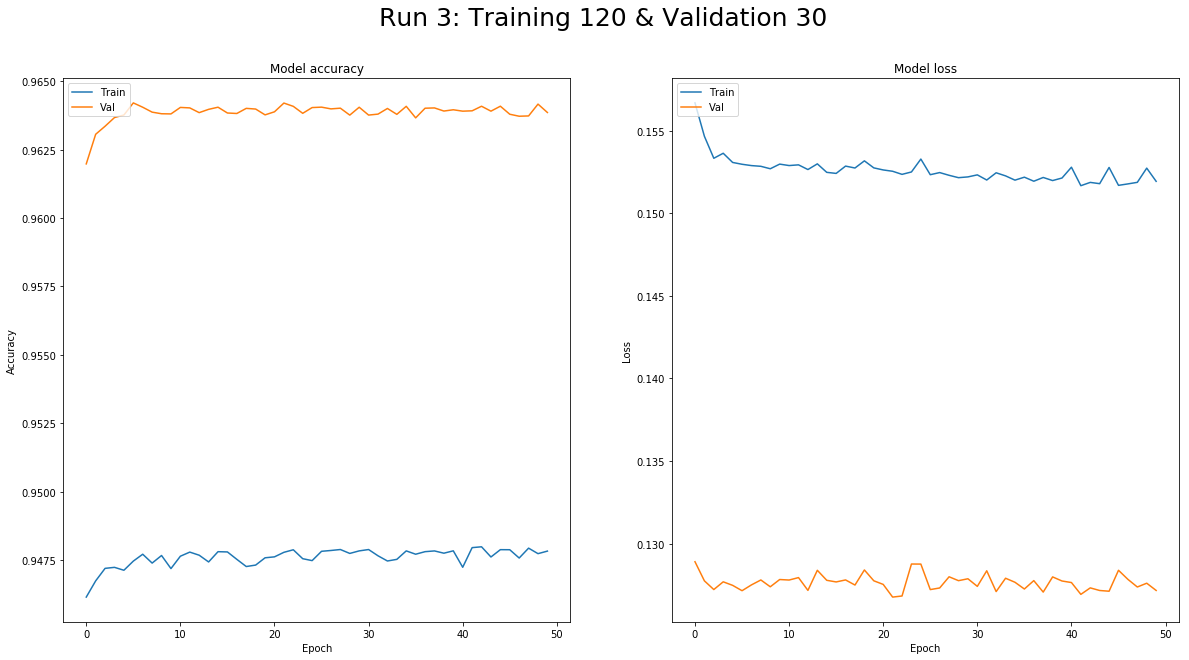

In [175]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Run 3: Training 120 & Validation 30', fontsize = 25)
# Plot training & validation accuracy values
fig.add_subplot(121)
plt.plot(training512_2c.history['acc'])
plt.plot(training512_2c.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')


# Plot training & validation loss values
fig.add_subplot(122)
plt.plot(training512_2c.history['loss'])
plt.plot(training512_2c.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

fig.savefig(projectpath+'/512by512/'+'run3.png',dpi=600)

In [244]:
test512_2c = model512_2.evaluate(imagetest512[:],labeltest512[:], batch_size=4,verbose=1)
print('The loss is %f and the accuracy is %f' %(test512_2c[0],test512_2c[1]))

90/90 [==============================] - 5s 61ms/step
The loss is 0.141841 and the accuracy is 0.952468


In [245]:
predictedlabels_512_2c = model512_2.predict(imagetest512[:], batch_size=4)
predictedlabels_512_2c.shape

(90, 512, 512, 5)

In [246]:
# Let's save this model:
model512_2.save(projectpath+'/model512_2c.h5')

## Evaluate Performance

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

## We will first convert labels to 0,1,2,3 or 4

In [20]:
# Convert Labels for Testing Set
iterations = 90
size = 512
# Create Arrays 
predictedlabels_int_512_2c = np.zeros((iterations,size,size,1),dtype = 'int')
predictedlabels_rgb_512_2c = np.zeros((iterations,size,size,3),dtype = 'int')
testlabels_int_512 = np.zeros((iterations,size,size,1), dtype='int')
testlabels_rgb_512 = np.zeros((iterations,size,size,3),dtype = 'int')
# There are 90 files in the testing arena:
for nimage in np.arange(iterations):
    print('I am reading image %d of %d'%(nimage,iterations))
    for ind1 in np.arange(size):
        for ind2 in np.arange(size):
            maxval = np.amax(predictedlabels_512_2c[nimage,ind1,ind2])
            for nclass in np.arange(5):
                if predictedlabels_512_2c[nimage,ind1,ind2][nclass] == maxval:
                    predictedlabels_int_512_2c[nimage,ind1,ind2] = nclass
                if labeltest512[nimage,ind1,ind2][nclass]== 1:
                    testlabels_int_512[nimage,ind1,ind2] = nclass
            
            # Color the predictions for visualization
            if predictedlabels_int_512_2c[nimage,ind1,ind2]==0:
                predictedlabels_rgb_512_2c[nimage,ind1,ind2] = np.array([51, 102, 255])
            elif predictedlabels_int_512_2c[nimage,ind1,ind2]==1:
                predictedlabels_rgb_512_2c[nimage,ind1,ind2] = np.array([102, 153, 153])
            elif predictedlabels_int_512_2c[nimage,ind1,ind2]==2:
                predictedlabels_rgb_512_2c[nimage,ind1,ind2] = np.array([255, 255, 255])
            elif predictedlabels_int_512_2c[nimage,ind1,ind2]==3:
                predictedlabels_rgb_512_2c[nimage,ind1,ind2] = np.array([0, 204, 0])
            elif predictedlabels_int_512_2c[nimage,ind1,ind2]==4:
                predictedlabels_rgb_512_2c[nimage,ind1,ind2] = np.array([255, 153, 0])
      
    # do the same for original testing images for easier comparison
            if testlabels_int_512[nimage,ind1,ind2]==0:
                testlabels_rgb_512[nimage,ind1,ind2] = np.array([51, 102, 255])
            elif testlabels_int_512[nimage,ind1,ind2]==1:
                testlabels_rgb_512[nimage,ind1,ind2] = np.array([102, 153, 153])
            elif testlabels_int_512[nimage,ind1,ind2]==2:
                testlabels_rgb_512[nimage,ind1,ind2] = np.array([255, 255, 255])
            elif testlabels_int_512[nimage,ind1,ind2]==3:
                testlabels_rgb_512[nimage,ind1,ind2] = np.array([0, 204, 0])
            elif testlabels_int_512[nimage,ind1,ind2]==4:
                testlabels_rgb_512[nimage,ind1,ind2] = np.array([255, 153, 0])      

predictedlabels_int_512_2c.shape,predictedlabels_rgb_512_2c.shape,testlabels_int_512.shape,testlabels_rgb_512.shape

I am reading image 0 of 90
I am reading image 1 of 90
I am reading image 2 of 90
I am reading image 3 of 90
I am reading image 4 of 90
I am reading image 5 of 90
I am reading image 6 of 90
I am reading image 7 of 90
I am reading image 8 of 90
I am reading image 9 of 90
I am reading image 10 of 90
I am reading image 11 of 90
I am reading image 12 of 90
I am reading image 13 of 90
I am reading image 14 of 90
I am reading image 15 of 90
I am reading image 16 of 90
I am reading image 17 of 90
I am reading image 18 of 90
I am reading image 19 of 90
I am reading image 20 of 90
I am reading image 21 of 90
I am reading image 22 of 90
I am reading image 23 of 90
I am reading image 24 of 90
I am reading image 25 of 90
I am reading image 26 of 90
I am reading image 27 of 90
I am reading image 28 of 90
I am reading image 29 of 90
I am reading image 30 of 90
I am reading image 31 of 90
I am reading image 32 of 90
I am reading image 33 of 90
I am reading image 34 of 90
I am reading image 35 of 90
I 

((90, 512, 512, 1), (90, 512, 512, 3), (90, 512, 512, 1), (90, 512, 512, 3))

Normalized confusion matrix


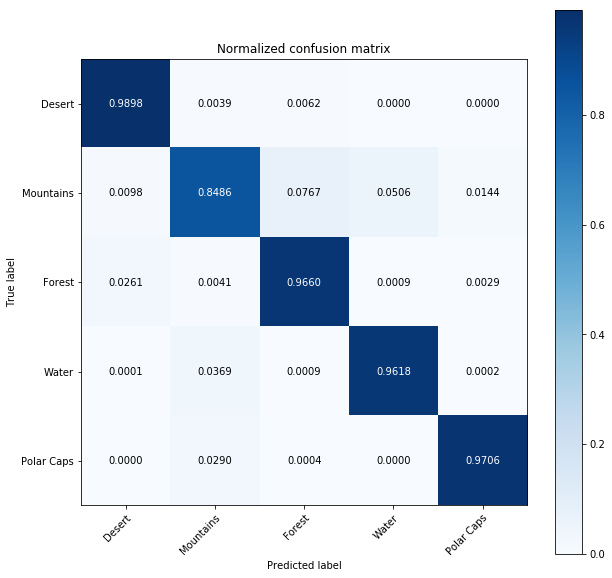

In [162]:
length = 90*512*512
truth_512 = np.reshape(testlabels_int_512,(length))
predicts_512 = np.reshape(predictedlabels_int_512_2c,(length))
truth_512.shape,predicts_512.shape 

cm_512 = plot_confusion_matrix(truth_512,predicts_512,normalize=True)

In [179]:
cm_512.figure.savefig(projectpath+'/512by512/'+'cm.png',dpi=600)

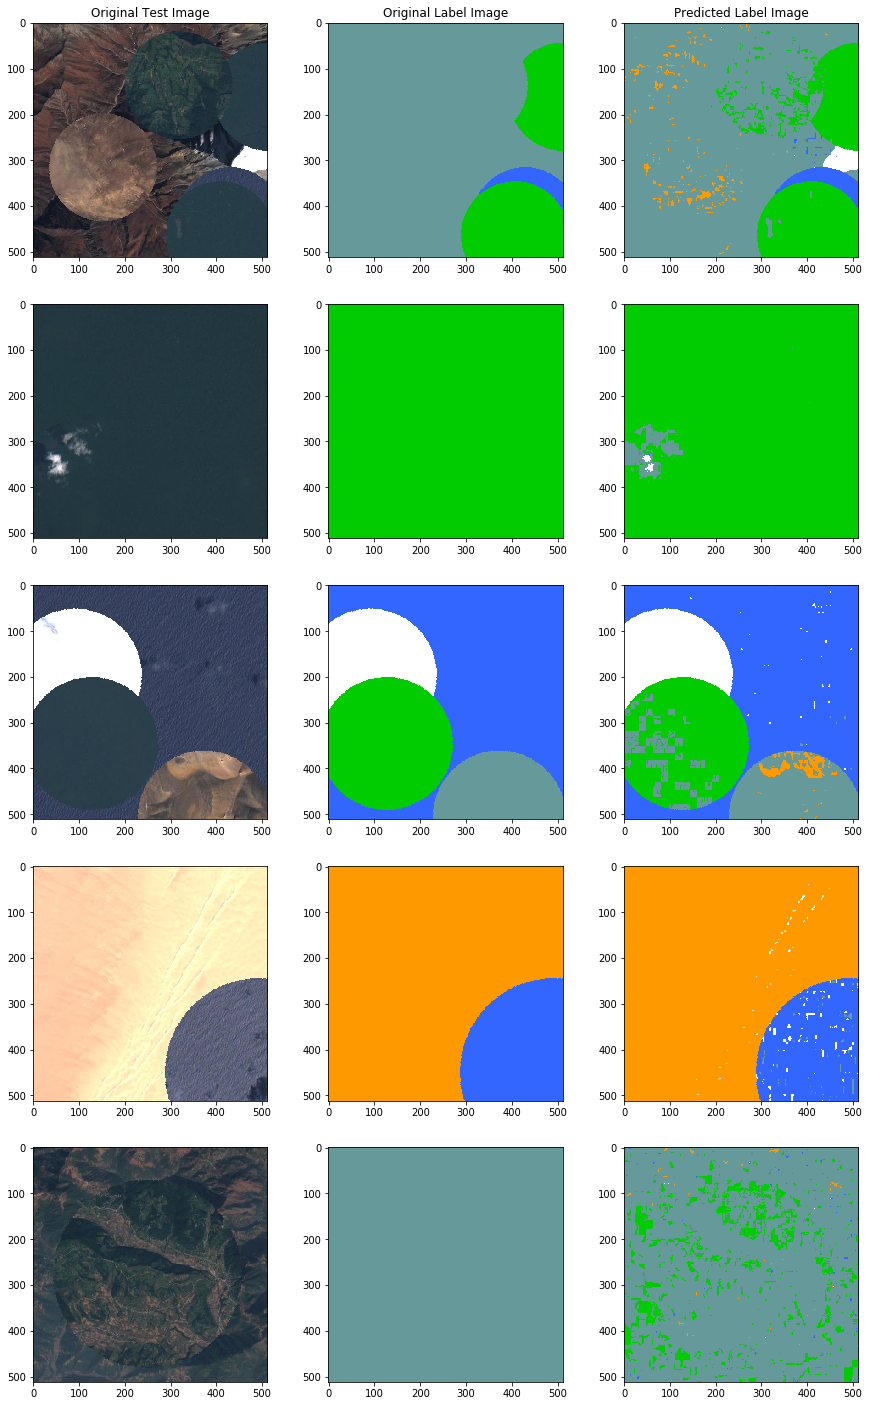

In [251]:
# Taking a look at 5 predicted samples
fig = plt.figure(figsize=(15,25))

ax0 = fig.add_subplot(531)
plt.imshow(imagetest512[0])
ax0.set_title('Original Test Image')

ax1 = fig.add_subplot(532)
plt.imshow(testlabels_rgb_512[0])
ax1.set_title('Original Label Image')

ax2 = fig.add_subplot(533)
plt.imshow(predictedlabels_rgb_512_2c[0])
ax2.set_title('Predicted Label Image')
#
fig.add_subplot(534)
plt.imshow(imagetest512[1])

fig.add_subplot(535)
plt.imshow(testlabels_rgb_512[1])

fig.add_subplot(536)
plt.imshow(predictedlabels_rgb_512_2c[1])
#
fig.add_subplot(537)
plt.imshow(imagetest512[2])

fig.add_subplot(538)
plt.imshow(testlabels_rgb_512[2])

fig.add_subplot(539)
plt.imshow(predictedlabels_rgb_512_2c[2])
#
fig.add_subplot(5,3,10)
plt.imshow(imagetest512[3])

fig.add_subplot(5,3,11)
plt.imshow(testlabels_rgb_512[3])

fig.add_subplot(5,3,12)
plt.imshow(predictedlabels_rgb_512_2c[3])
#
fig.add_subplot(5,3,13)
plt.imshow(imagetest512[4])

fig.add_subplot(5,3,14)
plt.imshow(testlabels_rgb_512[4])

fig.add_subplot(5,3,15)
plt.imshow(predictedlabels_rgb_512_2c[4])
#


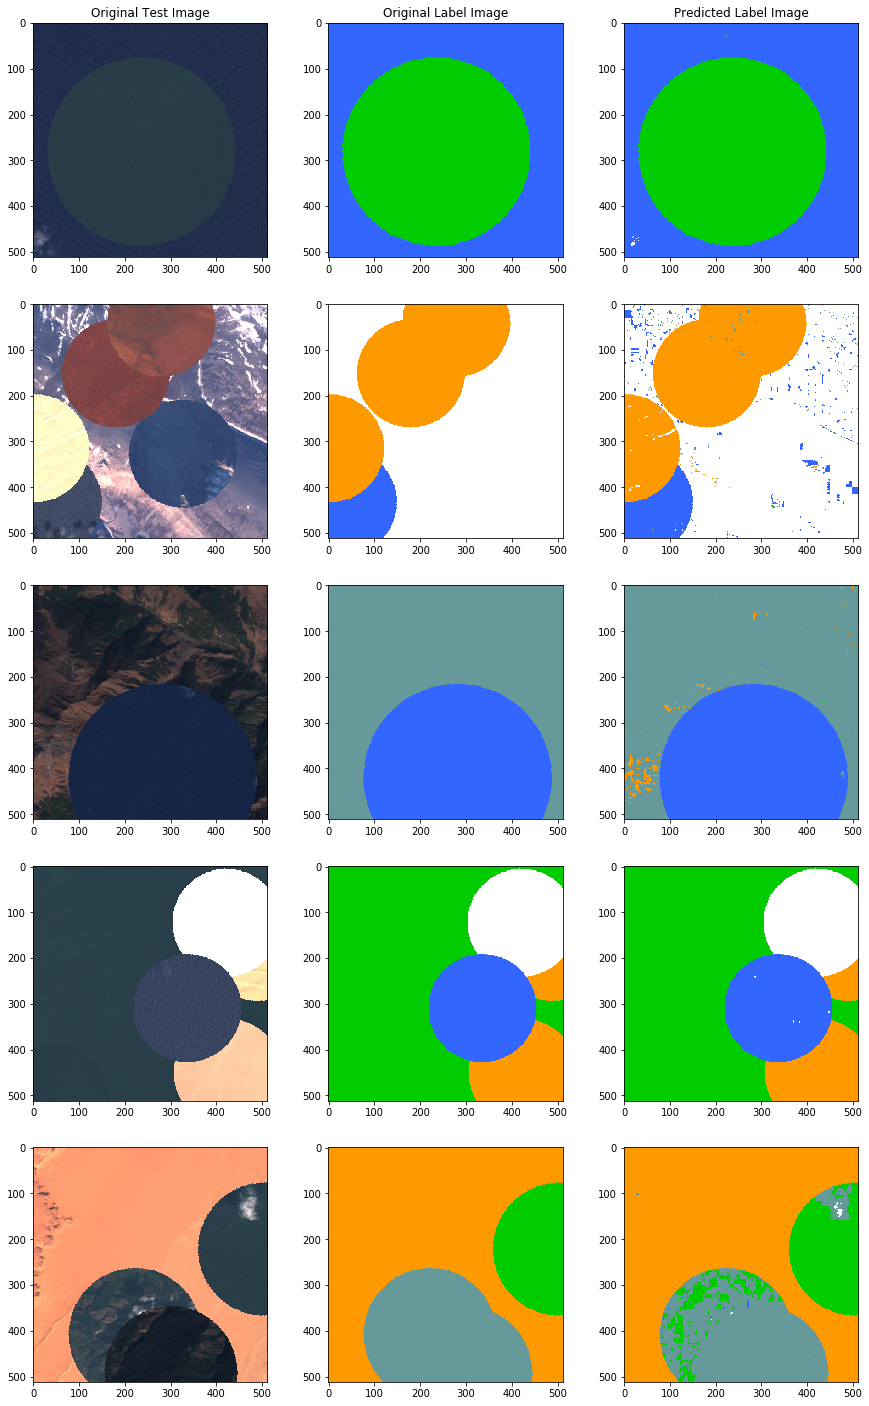

In [252]:
# Taking a look at 5 predicted samples#
fig = plt.figure(figsize=(15,25))

ax0 = fig.add_subplot(531)
plt.imshow(imagetest512[5])
ax0.set_title('Original Test Image')

ax1 = fig.add_subplot(532)
plt.imshow(testlabels_rgb_512[5])
ax1.set_title('Original Label Image')

ax2 = fig.add_subplot(533)
plt.imshow(predictedlabels_rgb_512_2c[5])
ax2.set_title('Predicted Label Image')
#
fig.add_subplot(534)
plt.imshow(imagetest512[6])

fig.add_subplot(535)
plt.imshow(testlabels_rgb_512[6])

fig.add_subplot(536)
plt.imshow(predictedlabels_rgb_512_2c[6])
#
fig.add_subplot(537)
plt.imshow(imagetest512[7])

fig.add_subplot(538)
plt.imshow(testlabels_rgb_512[7])

fig.add_subplot(539)
plt.imshow(predictedlabels_rgb_512_2c[7])
#
fig.add_subplot(5,3,10)
plt.imshow(imagetest512[8])

fig.add_subplot(5,3,11)
plt.imshow(testlabels_rgb_512[8])

fig.add_subplot(5,3,12)
plt.imshow(predictedlabels_rgb_512_2c[8])
#
fig.add_subplot(5,3,13)
plt.imshow(imagetest512[9])

fig.add_subplot(5,3,14)
plt.imshow(testlabels_rgb_512[9])

fig.add_subplot(5,3,15)
plt.imshow(predictedlabels_rgb_512_2c[9])
#


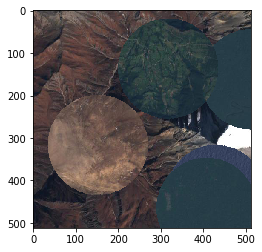

In [253]:
plt.imshow(imagetest512[0])

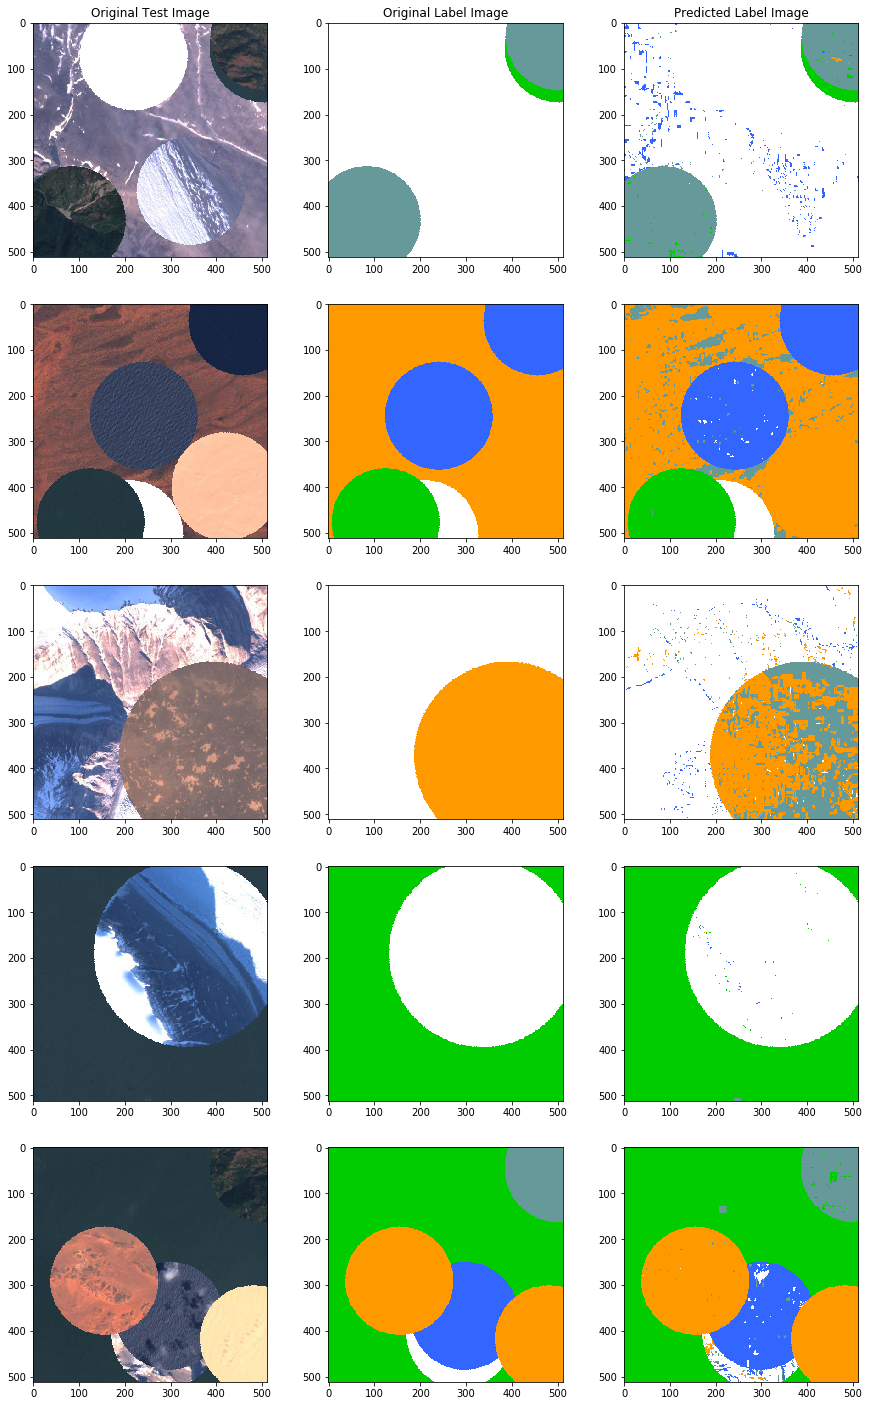

In [257]:
## Taking a look at 5 predicted samples
fig = plt.figure(figsize=(15,25))
imlist=np.arange(10,15)
ax0 = fig.add_subplot(531)
plt.imshow(imagetest512[imlist[0]])
ax0.set_title('Original Test Image')

ax1 = fig.add_subplot(532)
plt.imshow(testlabels_rgb_512[imlist[0]])
ax1.set_title('Original Label Image')

ax2 = fig.add_subplot(533)
plt.imshow(predictedlabels_rgb_512_2c[imlist[0]])
ax2.set_title('Predicted Label Image')
#
fig.add_subplot(534)
plt.imshow(imagetest512[imlist[1]])

fig.add_subplot(535)
plt.imshow(testlabels_rgb_512[imlist[1]])

fig.add_subplot(536)
plt.imshow(predictedlabels_rgb_512_2c[imlist[1]])
#
fig.add_subplot(537)
plt.imshow(imagetest512[imlist[2]])

fig.add_subplot(538)
plt.imshow(testlabels_rgb_512[imlist[2]])

fig.add_subplot(539)
plt.imshow(predictedlabels_rgb_512_2c[imlist[2]])
#
fig.add_subplot(5,3,10)
plt.imshow(imagetest512[imlist[3]])

fig.add_subplot(5,3,11)
plt.imshow(testlabels_rgb_512[imlist[3]])

fig.add_subplot(5,3,12)
plt.imshow(predictedlabels_rgb_512_2c[imlist[3]])
#
fig.add_subplot(5,3,13)
plt.imshow(imagetest512[imlist[4]])

fig.add_subplot(5,3,14)
plt.imshow(testlabels_rgb_512[imlist[4]])

fig.add_subplot(5,3,15)
plt.imshow(predictedlabels_rgb_512_2c[imlist[4]])
#


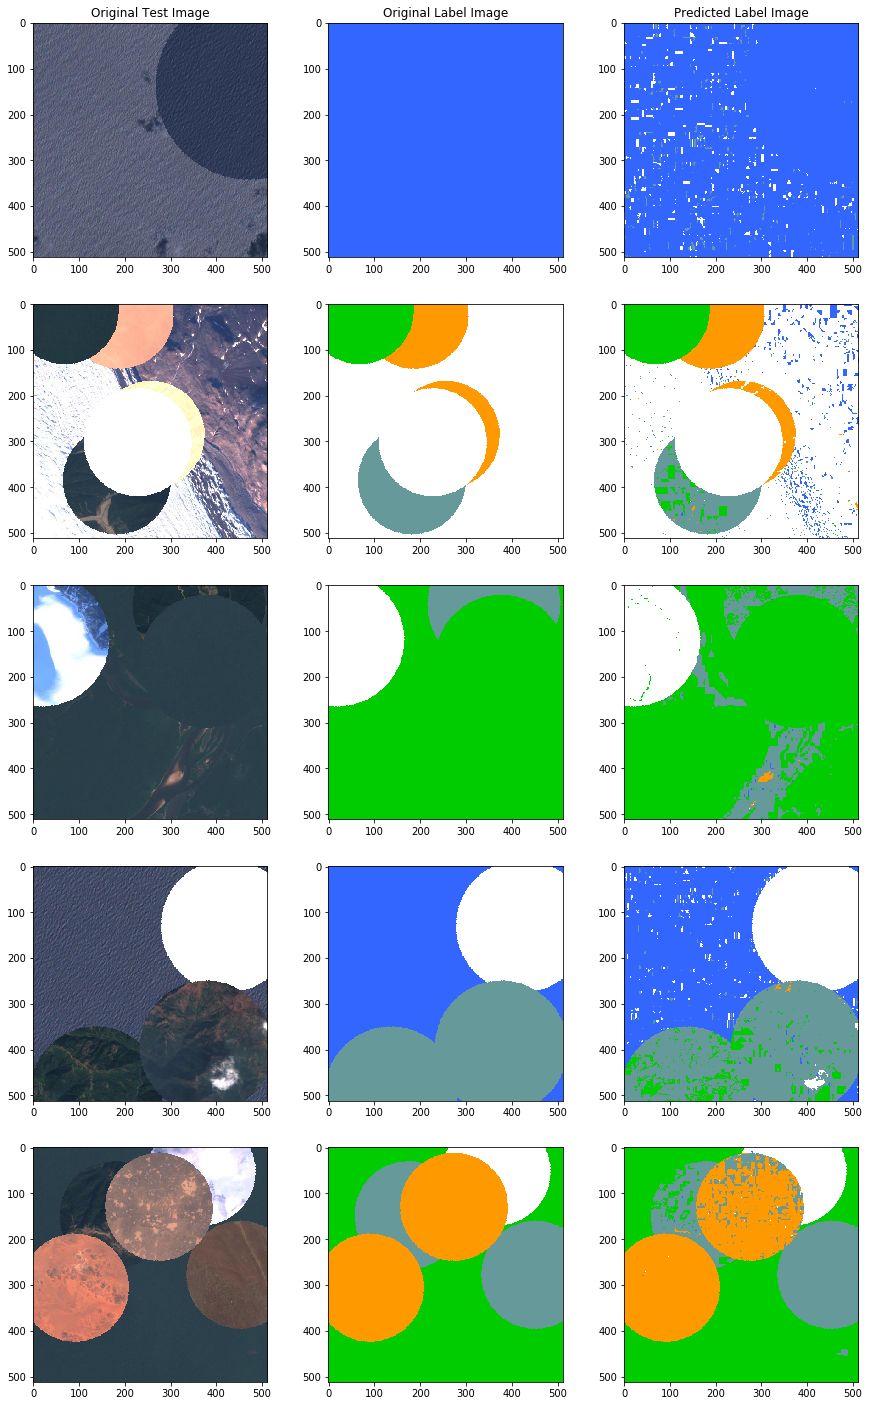

In [258]:
# Taking a look at 5 predicted samples#
fig = plt.figure(figsize=(15,25))
imlist=np.arange(15,20)
ax0 = fig.add_subplot(531)
plt.imshow(imagetest512[imlist[0]])
ax0.set_title('Original Test Image')

ax1 = fig.add_subplot(532)
plt.imshow(testlabels_rgb_512[imlist[0]])
ax1.set_title('Original Label Image')

ax2 = fig.add_subplot(533)
plt.imshow(predictedlabels_rgb_512_2c[imlist[0]])
ax2.set_title('Predicted Label Image')
#
fig.add_subplot(534)
plt.imshow(imagetest512[imlist[1]])

fig.add_subplot(535)
plt.imshow(testlabels_rgb_512[imlist[1]])

fig.add_subplot(536)
plt.imshow(predictedlabels_rgb_512_2c[imlist[1]])
#
fig.add_subplot(537)
plt.imshow(imagetest512[imlist[2]])

fig.add_subplot(538)
plt.imshow(testlabels_rgb_512[imlist[2]])

fig.add_subplot(539)
plt.imshow(predictedlabels_rgb_512_2c[imlist[2]])
#
fig.add_subplot(5,3,10)
plt.imshow(imagetest512[imlist[3]])

fig.add_subplot(5,3,11)
plt.imshow(testlabels_rgb_512[imlist[3]])

fig.add_subplot(5,3,12)
plt.imshow(predictedlabels_rgb_512_2c[imlist[3]])
#
fig.add_subplot(5,3,13)
plt.imshow(imagetest512[imlist[4]])

fig.add_subplot(5,3,14)
plt.imshow(testlabels_rgb_512[imlist[4]])

fig.add_subplot(5,3,15)
plt.imshow(predictedlabels_rgb_512_2c[imlist[4]])
#


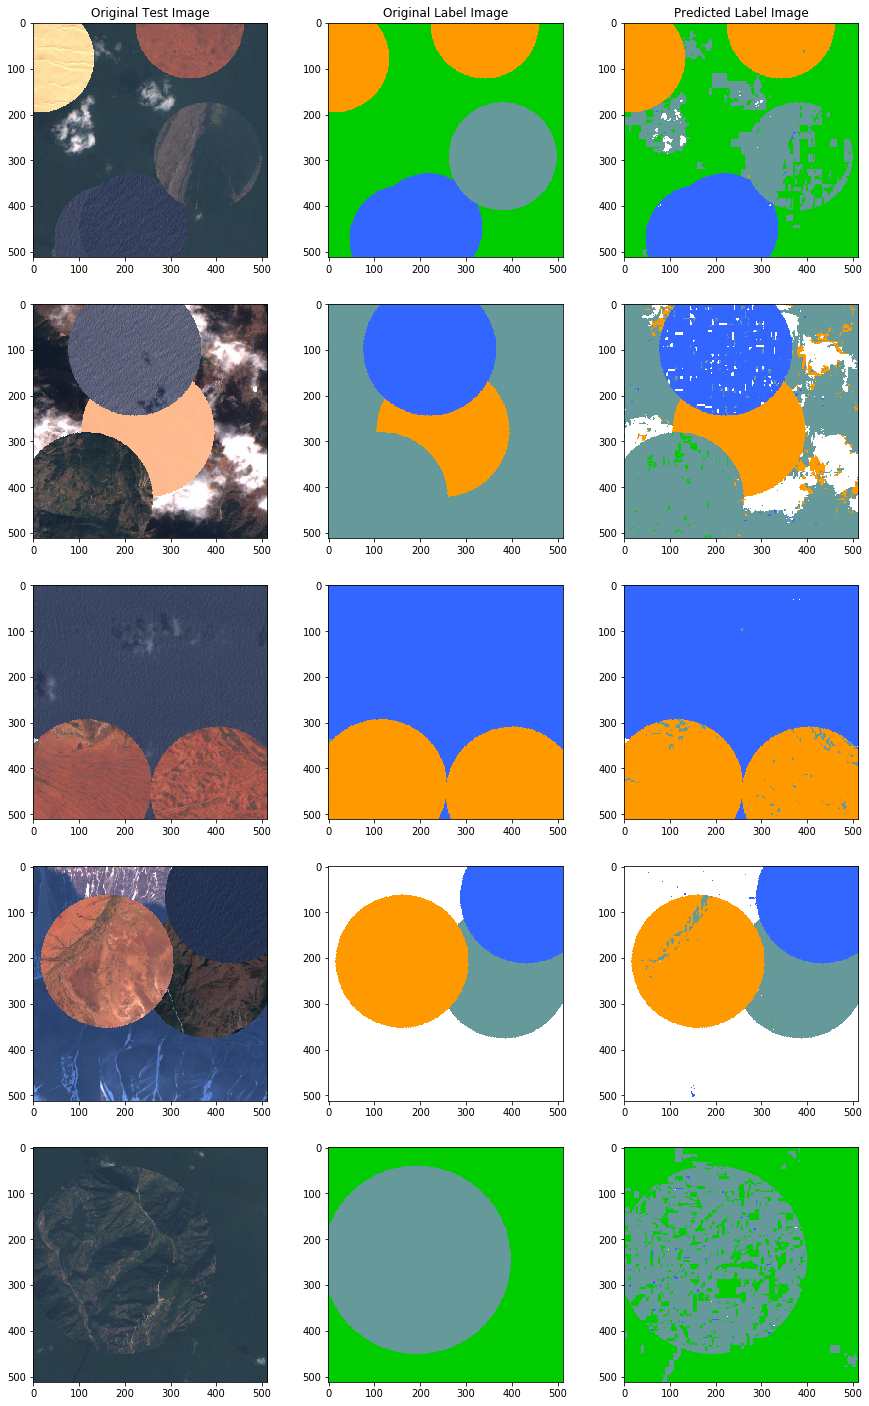

In [260]:
# Taking a look at 5 predicted samples#
fig = plt.figure(figsize=(15,25))
imlist=np.arange(20,25)
ax0 = fig.add_subplot(531)
plt.imshow(imagetest512[imlist[0]])
ax0.set_title('Original Test Image')

ax1 = fig.add_subplot(532)
plt.imshow(testlabels_rgb_512[imlist[0]])
ax1.set_title('Original Label Image')

ax2 = fig.add_subplot(533)
plt.imshow(predictedlabels_rgb_512_2c[imlist[0]])
ax2.set_title('Predicted Label Image')
#
fig.add_subplot(534)
plt.imshow(imagetest512[imlist[1]])

fig.add_subplot(535)
plt.imshow(testlabels_rgb_512[imlist[1]])

fig.add_subplot(536)
plt.imshow(predictedlabels_rgb_512_2c[imlist[1]])
#
fig.add_subplot(537)
plt.imshow(imagetest512[imlist[2]])

fig.add_subplot(538)
plt.imshow(testlabels_rgb_512[imlist[2]])

fig.add_subplot(539)
plt.imshow(predictedlabels_rgb_512_2c[imlist[2]])
#
fig.add_subplot(5,3,10)
plt.imshow(imagetest512[imlist[3]])

fig.add_subplot(5,3,11)
plt.imshow(testlabels_rgb_512[imlist[3]])

fig.add_subplot(5,3,12)
plt.imshow(predictedlabels_rgb_512_2c[imlist[3]])
#
fig.add_subplot(5,3,13)
plt.imshow(imagetest512[imlist[4]])

fig.add_subplot(5,3,14)
plt.imshow(testlabels_rgb_512[imlist[4]])

fig.add_subplot(5,3,15)
plt.imshow(predictedlabels_rgb_512_2c[imlist[4]])
#


## Load Last Model

In [15]:
from keras.models import load_model
loadedmodel = load_model(projectpath+'/512by512/model512_2c.h5')

In [16]:
test512_2c = loadedmodel.evaluate(imagetest512[:],labeltest512[:], batch_size=4,verbose=1)
print('The loss is %f and the accuracy is %f' %(test512_2c[0],test512_2c[1]))

90/90 [==============================] - 6s 64ms/step
The loss is 0.141841 and the accuracy is 0.952468


In [18]:
predictedlabels_512_2c = loadedmodel.predict(imagetest512[:], batch_size=4)
predictedlabels_512_2c.shape

(90, 512, 512, 5)

## Evaluate Performance

In [21]:
#Before calculating cm with 0diagonals - run the code to convert the output to the desired format!

Normalized confusion matrix


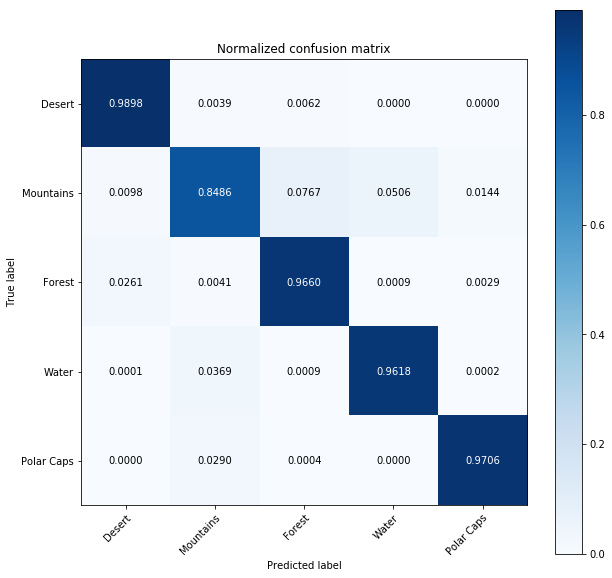

In [22]:
length = 90*512*512
truth_512 = np.reshape(testlabels_int_512,(length))
predicts_512 = np.reshape(predictedlabels_int_512_2c,(length))
truth_512.shape,predicts_512.shape 

cm_512 = plot_confusion_matrix(truth_512,predicts_512,normalize=True)

Confusion matrix, without normalization


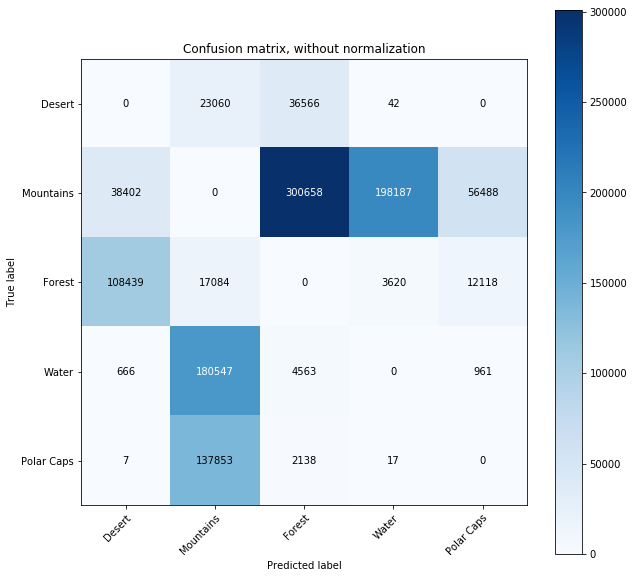

In [71]:
plot_confusion_matrix_0_diagonals(truth_512,predicts_512)

In [86]:
def plot_confusion_matrix_with0_diagonals(y_true, y_pred, normalize=False, title=None, cmap=plt.cm.Blues,figuresize=(20,10)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    classes = ['Desert', 'Mountains', 'Forest','Water','Polar Caps']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #copy normalized cm
    cm0=cm
    fig = plt.figure(figsize=figuresize)
    ax1 = fig.add_subplot(121)
    im1 = ax1.imshow(cm, interpolation='nearest', cmap=cmap)
    ax1.figure.colorbar(im1, ax=ax1)
    ax1.figure
    # We want to show all ticks...
    ax1.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Prediction VS Truth',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax1.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
## do same for cm0            
    np.fill_diagonal(cm0,0)
    ax2 = fig.add_subplot(122)
    im2 = ax2.imshow(cm0, interpolation='nearest', cmap=plt.cm.Reds)
    ax2.figure.colorbar(im2, ax=ax2)
    ax2.figure
    # We want to show all ticks...
    ax2.set(xticks=np.arange(cm0.shape[1]),
           yticks=np.arange(cm0.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Errors in Predictions',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.4f' if normalize else 'd'
    thresh = cm0.max() / 2.
    for i in range(cm0.shape[0]):
        for j in range(cm0.shape[1]):
            ax2.text(j, i, format(cm0[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm0[i, j] > thresh else "black")
#     fig.tight_layout()
    fig.suptitle(title, fontsize=14)
    return fig

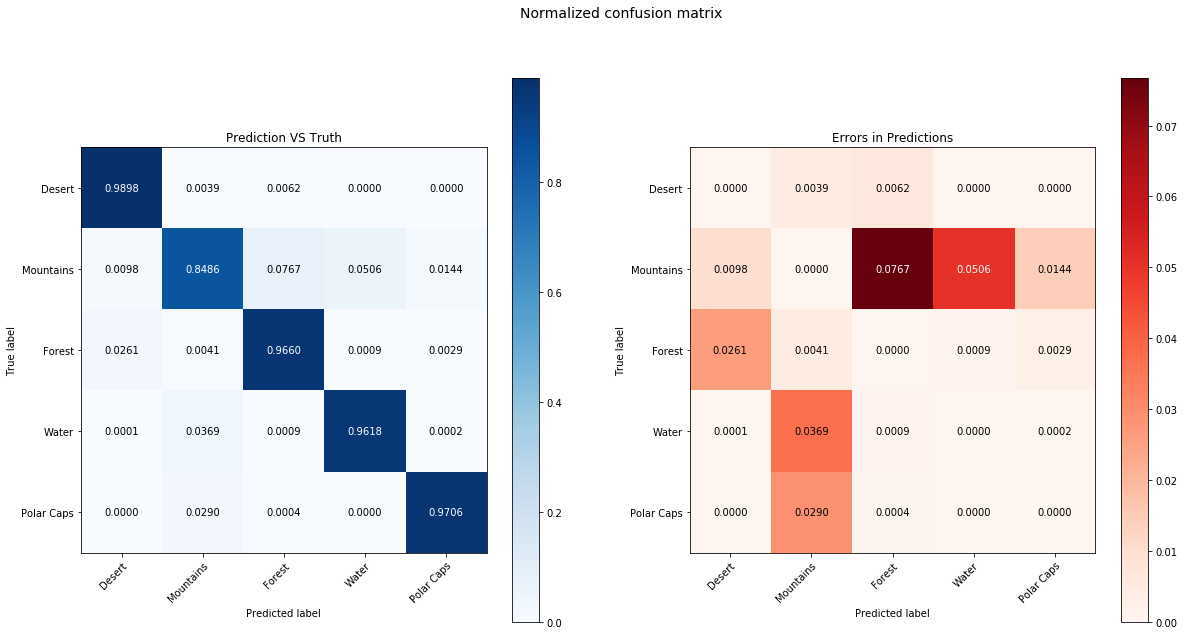

In [87]:
cms = plot_confusion_matrix_with0_diagonals(truth_512,predicts_512,normalize=True)
cms.savefig(projectpath+'/512by512/'+'CMs.png',dpi=600)

In [68]:
cm = confusion_matrix(truth_512, predicts_512)
print(cm)
np.fill_diagonal(cm,0)
print(cm)

[[5805444   23060   36566      42       0]
 [  38402 3326748  300658  198187   56488]
 [ 108439   17084 4017962    3620   12118]
 [    666  180547    4563 4706145     961]
 [      7  137853    2138      17 4615245]]
[[     0  23060  36566     42      0]
 [ 38402      0 300658 198187  56488]
 [108439  17084      0   3620  12118]
 [   666 180547   4563      0    961]
 [     7 137853   2138     17      0]]
